# Importation of the libraries and datasets

In [1]:
# Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)
import statistics as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy as scipy
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


In [2]:
# FAO Dataframes

# FAO animal slaughter data
slaughter = pd.read_csv("C:/Users/shaun/OneDrive/MSc Data Analytics/CA2 Semester 1/Data/FAOSTAT_slaughtered.csv", 
                        low_memory=False)

# FAO meat production data
meat = pd.read_csv("C:/Users/shaun/OneDrive/MSc Data Analytics/CA2 Semester 1/Data/FAOSTAT_production_quantity.csv", 
                   low_memory=False)

# FAO livestock Stocking data
stock = pd.read_csv("C:/Users/shaun/OneDrive/MSc Data Analytics/CA2 Semester 1/Data/FAOSTAT_stocks.csv", 
                    low_memory=False)

# FAO live stock import / export data
imp_exp = pd.read_csv("C:/Users/shaun/OneDrive/MSc Data Analytics/CA2 Semester 1/Data/FAOSTAT_import_export.csv", 
                      low_memory=False)

# Exploratory data analysis

## Animal slaughter data

Here we view the head and shape of the data

In [3]:
slaughter.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,255,Belgium,5320,Producing Animals/Slaughtered,867,"Meat, cattle",2000,2000,Head,832926.0,NaN,Official data
1,QCL,Crops and livestock products,255,Belgium,5320,Producing Animals/Slaughtered,867,"Meat, cattle",2001,2001,Head,873268.0,NaN,Official data
2,QCL,Crops and livestock products,255,Belgium,5320,Producing Animals/Slaughtered,867,"Meat, cattle",2002,2002,Head,932473.0,NaN,Official data
3,QCL,Crops and livestock products,255,Belgium,5320,Producing Animals/Slaughtered,867,"Meat, cattle",2003,2003,Head,853641.0,NaN,Official data
4,QCL,Crops and livestock products,255,Belgium,5320,Producing Animals/Slaughtered,867,"Meat, cattle",2004,2004,Head,842585.0,NaN,Official data


In [4]:
slaughter.shape

(3746, 14)

In [5]:
slaughter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3746 entries, 0 to 3745
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       3746 non-null   object 
 1   Domain            3746 non-null   object 
 2   Area Code (FAO)   3746 non-null   int64  
 3   Area              3746 non-null   object 
 4   Element Code      3746 non-null   int64  
 5   Element           3746 non-null   object 
 6   Item Code (FAO)   3746 non-null   int64  
 7   Item              3746 non-null   object 
 8   Year Code         3746 non-null   int64  
 9   Year              3746 non-null   int64  
 10  Unit              3746 non-null   object 
 11  Value             3654 non-null   float64
 12  Flag              1401 non-null   object 
 13  Flag Description  3746 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 409.8+ KB


In [6]:
slaughter.describe()

,Area Code (FAO),Element Code,Item Code (FAO),Year Code,Year,Value
count,3746.000000,3746.000000,3746.000000,3746.000000,3746.000000,3.654000e+03
mean,153.586759,5320.452483,1036.179391,1997.905499,1997.905499,1.232273e+07
std,98.639385,0.497803,73.686268,13.784635,13.784635,5.686957e+07
min,54.000000,5320.000000,867.000000,1973.000000,1973.000000,0.000000e+00
25%,79.000000,5320.000000,1017.000000,1986.000000,1986.000000,1.230950e+04
50%,106.000000,5320.000000,1058.000000,1999.000000,1999.000000,2.321095e+05
75%,231.000000,5321.000000,1080.000000,2010.000000,2010.000000,2.915900e+06
max,351.000000,5321.000000,1163.000000,2020.000000,2020.000000,7.449179e+08


The data is in its current layout is not suitable for statistical analysis as each country is a row.
I need to melt the data so that the values for each country are in a column item type.

In [7]:
slaughter.Item.unique()

array(['Meat, cattle', 'Meat, chicken', 'Meat, duck', 'Meat, goat',
       'Meat, horse', 'Meat, pig', 'Meat, sheep', 'Meat, turkey',
       'Meat, goose and guinea fowl', 'Meat, rabbit', 'Meat, game'],
      dtype=object)

There are 11 animal categories in the slaughter data. I can remove the repetition from these item categories when I clean the data

In [8]:
slaughter.Area.unique()

array(['Belgium', 'China', 'Denmark', 'France', 'Germany', 'Ireland',
       'Italy', 'Luxembourg', 'Netherlands', 'United States of America'],
      dtype=object)

The dataset contains 8 EU countries Belgium, Denmark, France, Germany, Luxembourg, Ireland, Italy and the Netherlands. All of these countries have been member states since at least Jan 1st 1973.

Belgium, France, Germany, Luxembourg, Italy and the Netherlands founded the EU in 1957 with Ireland and Denmark Joining on the 1st January 1973.

Therefore, to ensure data comparability between these countries and the US and China, I limited the datasets time frame from 1st January 1973 to 31st December 2020 (most recent data available). This ensures that all European countries were member states of the EU at the time of analysis. 

We can confirm this as follows

In [9]:
slaughter.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999], dtype=int64)

In [10]:
print(f"The earliest year in the dataset is {slaughter.Year.min()} and the maximum year is {slaughter.Year.max()}")

The earliest year in the dataset is 1973 and the maximum year is 2020


Next we can observe what units the slaughter data has been recorded in

In [11]:
slaughter.Unit.unique()

array(['Head', '1000 Head'], dtype=object)

Slaughter units have been reported as per "head" and per "thousand heads" of animal.

In [12]:
slaughter.Element.unique()

array(['Producing Animals/Slaughtered'], dtype=object)

All livestock in this dataset is at slaughter.

Checking for null values

In [13]:
slaughter.isnull().sum()

Domain Code            0
Domain                 0
Area Code (FAO)        0
Area                   0
Element Code           0
Element                0
Item Code (FAO)        0
Item                   0
Year Code              0
Year                   0
Unit                   0
Value                 92
Flag                2345
Flag Description       0
dtype: int64

In [14]:
# Function to calculate % missing

def calc_percent_missing(no_observations, maxobservations):
    '''This takes the number of missing and maximum observations as inputs. It
    then calculates the no of missing observations as a percentage of the total observations'''
    percent_miss = round((no_observations / maxobservations) * (100 / 1), 2)
    print(f"The percentage of missing values is:\n{percent_miss}")
    


In [15]:
calc_percent_missing(slaughter.isnull().sum(), len(slaughter))

The percentage of missing values is:
Domain Code          0.00
Domain               0.00
Area Code (FAO)      0.00
Area                 0.00
Element Code         0.00
Element              0.00
Item Code (FAO)      0.00
Item                 0.00
Year Code            0.00
Year                 0.00
Unit                 0.00
Value                2.46
Flag                62.60
Flag Description     0.00
dtype: float64


There are missing values in the "Value" and "Flag" columns.  The flag column is not important to our data analysis
so I can remove this during data preparation. However, the value column requires further investigation. We can test if these values are missing at random or not at random by filtering the values that are NaN or 0

In [16]:
# Creating a data frame of missing slaughtervalues
slaughter_miss = slaughter.loc[(slaughter['Value'] == slaughter.Value.isnull())]

In [17]:
slaughter_miss.head(50)

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
789,QCL,Crops and livestock products,54,Denmark,5320,Producing Animals/Slaughtered,1017,"Meat, goat",2018,2018,Head,0.0,NaN,Official data
790,QCL,Crops and livestock products,54,Denmark,5320,Producing Animals/Slaughtered,1017,"Meat, goat",2019,2019,Head,0.0,NaN,Official data
791,QCL,Crops and livestock products,54,Denmark,5320,Producing Animals/Slaughtered,1017,"Meat, goat",2020,2020,Head,0.0,NaN,Official data
2148,QCL,Crops and livestock products,104,Ireland,5320,Producing Animals/Slaughtered,1017,"Meat, goat",2018,2018,Head,0.0,NaN,Official data
2149,QCL,Crops and livestock products,104,Ireland,5320,Producing Animals/Slaughtered,1017,"Meat, goat",2019,2019,Head,0.0,NaN,Official data
2150,QCL,Crops and livestock products,104,Ireland,5320,Producing Animals/Slaughtered,1017,"Meat, goat",2020,2020,Head,0.0,NaN,Official data
2844,QCL,Crops and livestock products,256,Luxembourg,5321,Producing Animals/Slaughtered,1058,"Meat, chicken",2018,2018,1000 Head,0.0,NaN,Official data
2845,QCL,Crops and livestock products,256,Luxembourg,5321,Producing Animals/Slaughtered,1058,"Meat, chicken",2019,2019,1000 Head,0.0,NaN,Official data
2846,QCL,Crops and livestock products,256,Luxembourg,5321,Producing Animals/Slaughtered,1058,"Meat, chicken",2020,2020,1000 Head,0.0,NaN,Official data
2847,QCL,Crops and livestock products,256,Luxembourg,5321,Producing Animals/Slaughtered,1069,"Meat, duck",2018,2018,1000 Head,0.0,NaN,Official data


In [18]:
# Investigating if the missing data is at random or not at random by checking if it's specific animal categories or not
slaughter_miss.Item.unique()

array(['Meat, goat', 'Meat, chicken', 'Meat, duck', 'Meat, horse',
       'Meat, turkey'], dtype=object)

In [19]:
slaughter_miss.Value.unique()

array([0.])

In [20]:
# Investigating if the missing data is at random or not at random by checking if it's specific country's or not
slaughter_miss.Area.unique()

array(['Denmark', 'Ireland', 'Luxembourg', 'Netherlands'], dtype=object)

In [21]:
slaughter_miss.Year.unique()

array([2018, 2019, 2020, 2000, 2001, 1973, 1974, 1975, 1976], dtype=int64)

This shows that the missing data is NOT at random, certain countries did not submit data for certain animal categories on certain years. I will deal with this during data preparation.

## Meat production data

In [22]:
meat.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,255,Belgium,5510,Production,867,"Meat, cattle",2000,2000,tonnes,275360.0,NaN,Official data
1,QCL,Crops and livestock products,255,Belgium,5510,Production,867,"Meat, cattle",2001,2001,tonnes,285250.0,NaN,Official data
2,QCL,Crops and livestock products,255,Belgium,5510,Production,867,"Meat, cattle",2002,2002,tonnes,305388.0,NaN,Official data
3,QCL,Crops and livestock products,255,Belgium,5510,Production,867,"Meat, cattle",2003,2003,tonnes,275170.0,NaN,Official data
4,QCL,Crops and livestock products,255,Belgium,5510,Production,867,"Meat, cattle",2004,2004,tonnes,280931.0,NaN,Official data


In [23]:
meat.shape

(3940, 14)

In [24]:
meat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3940 entries, 0 to 3939
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       3940 non-null   object 
 1   Domain            3940 non-null   object 
 2   Area Code (FAO)   3940 non-null   int64  
 3   Area              3940 non-null   object 
 4   Element Code      3940 non-null   int64  
 5   Element           3940 non-null   object 
 6   Item Code (FAO)   3940 non-null   int64  
 7   Item              3940 non-null   object 
 8   Year Code         3940 non-null   int64  
 9   Year              3940 non-null   int64  
 10  Unit              3940 non-null   object 
 11  Value             3862 non-null   float64
 12  Flag              1298 non-null   object 
 13  Flag Description  3940 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 431.1+ KB


In [25]:
meat.describe()

,Area Code (FAO),Element Code,Item Code (FAO),Year Code,Year,Value
count,3940.000000,3940.0,3940.000000,3940.000000,3940.000000,3.862000e+03
mean,154.790102,5510.0,1042.574873,1997.820051,1997.820051,1.300366e+06
std,99.951755,0.0,77.053159,13.754285,13.754285,4.658044e+06
min,54.000000,5510.0,867.000000,1973.000000,1973.000000,0.000000e+00
25%,79.000000,5510.0,1017.000000,1986.000000,1986.000000,4.966500e+03
50%,106.000000,5510.0,1058.000000,1999.000000,1999.000000,6.400000e+04
75%,231.000000,5510.0,1080.000000,2010.000000,2010.000000,6.888240e+05
max,351.000000,5510.0,1163.000000,2020.000000,2020.000000,5.766187e+07


The data is in its current layout is not suitable for statistical analysis as each country is a row.
I need to melt the data so that the values for each country are in a column item type.

In [26]:
meat.Item.unique()

array(['Meat, cattle', 'Meat, chicken', 'Meat, duck', 'Meat, goat',
       'Meat, horse', 'Meat, pig', 'Meat, sheep', 'Meat, turkey',
       'Meat, game', 'Meat, goose and guinea fowl', 'Meat, rabbit'],
      dtype=object)

There are 11 animal categories in the production data. I can remove the repetition from these item categories when I clean the data

In [27]:
meat.Area.unique()

array(['Belgium', 'China', 'Denmark', 'France', 'Germany', 'Ireland',
       'Italy', 'Luxembourg', 'Netherlands', 'United States of America'],
      dtype=object)

As above:

The dataset contains 8 EU countries Belgium, Denmark, France, Germany, Luxembourg, Ireland, Italy and the Netherlands. All of these countries have been member states since at least Jan 1st 1973.

Belgium, France, Germany, Luxembourg, Italy and the Netherlands founded the EU in 1957 with Ireland and Denmark Joining on the 1st January 1973.

Therefore, to ensure data comparability between these countries and the US and China, I limited the datasets time frame from 1st January 1973 to 31st December 2020 (most recent data available). This ensures that all European countries were member states of the EU at the time of analysis. 

We can confirm this as follows

In [28]:
meat.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999], dtype=int64)

In [29]:
print(f"The earliest year in the dataset is {meat.Year.min()} and the maximum year is {meat.Year.max()}")

The earliest year in the dataset is 1973 and the maximum year is 2020


Next we can observe what units the meat production data has been recorded in

In [30]:
meat.Unit.unique()

array(['tonnes'], dtype=object)

Production data units have been reported in "tonnes".

In [31]:
meat.Element.unique()

array(['Production'], dtype=object)

All livestock in this dataset is at production.

Checking for null values

In [32]:
meat.isnull().sum()

Domain Code            0
Domain                 0
Area Code (FAO)        0
Area                   0
Element Code           0
Element                0
Item Code (FAO)        0
Item                   0
Year Code              0
Year                   0
Unit                   0
Value                 78
Flag                2642
Flag Description       0
dtype: int64

In [33]:
calc_percent_missing(meat.isnull().sum(), len(meat))

The percentage of missing values is:
Domain Code          0.00
Domain               0.00
Area Code (FAO)      0.00
Area                 0.00
Element Code         0.00
Element              0.00
Item Code (FAO)      0.00
Item                 0.00
Year Code            0.00
Year                 0.00
Unit                 0.00
Value                1.98
Flag                67.06
Flag Description     0.00
dtype: float64


There are missing values in the "Value" and "Flag" columns.  The flag column is not important to our data analysis
so I can remove this during data preparation. However, the value column requires further investigation. We can test if these values are missing at random or not at random by filtering the values that are NaN or 0

In [34]:
# Creating a data frame of missing meat production
meat_miss = meat.loc[(meat['Value'] == meat.Value.isnull())]

In [35]:
meat_miss.head(50)

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
883,QCL,Crops and livestock products,54,Denmark,5510,Production,1017,"Meat, goat",2018,2018,tonnes,0.0,NaN,Official data
884,QCL,Crops and livestock products,54,Denmark,5510,Production,1017,"Meat, goat",2019,2019,tonnes,0.0,NaN,Official data
885,QCL,Crops and livestock products,54,Denmark,5510,Production,1017,"Meat, goat",2020,2020,tonnes,0.0,NaN,Official data
1151,QCL,Crops and livestock products,54,Denmark,5510,Production,1080,"Meat, turkey",2018,2018,tonnes,0.0,NaN,Official data
1152,QCL,Crops and livestock products,54,Denmark,5510,Production,1080,"Meat, turkey",2019,2019,tonnes,0.0,NaN,Official data
1153,QCL,Crops and livestock products,54,Denmark,5510,Production,1080,"Meat, turkey",2020,2020,tonnes,0.0,NaN,Official data
1862,QCL,Crops and livestock products,79,Germany,5510,Production,1017,"Meat, goat",2018,2018,tonnes,0.0,NaN,Official data
1863,QCL,Crops and livestock products,79,Germany,5510,Production,1017,"Meat, goat",2019,2019,tonnes,0.0,NaN,Official data
1864,QCL,Crops and livestock products,79,Germany,5510,Production,1017,"Meat, goat",2020,2020,tonnes,0.0,NaN,Official data
2293,QCL,Crops and livestock products,104,Ireland,5510,Production,1017,"Meat, goat",2018,2018,tonnes,0.0,NaN,Official data


In [36]:
# Investigating if the missing data is at random or not at random by checking if it's specific animal categories or not
meat_miss.Item.unique()

array(['Meat, goat', 'Meat, turkey', 'Meat, chicken', 'Meat, duck',
       'Meat, horse', 'Meat, game'], dtype=object)

In [37]:
meat_miss.Value.unique()

array([0.])

In [38]:
# Investigating if the missing data is at random or not at random by checking if it's specific country's or not
meat_miss.Area.unique()

array(['Denmark', 'Germany', 'Ireland', 'Luxembourg', 'Netherlands'],
      dtype=object)

In [39]:
meat_miss.Year.unique()

array([2018, 2019, 2020, 2000, 2001, 1986, 2005], dtype=int64)

This shows that the missing data is NOT at random, certain countries did not submit data for certain animal categories on certain years. I will deal with this during data preparation.

In addition, it shows that the missing categories and years are similar to the Slaughter data. There may have been no requirement to report for these categories on these years.

## Livestock stocking data

In [40]:
stock.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,255,Belgium,5111,Stocks,866,Cattle,2000,2000,Head,3041560.0,NaN,Official data
1,QCL,Crops and livestock products,255,Belgium,5111,Stocks,866,Cattle,2001,2001,Head,3037760.0,NaN,Official data
2,QCL,Crops and livestock products,255,Belgium,5111,Stocks,866,Cattle,2002,2002,Head,2891260.0,NaN,Official data
3,QCL,Crops and livestock products,255,Belgium,5111,Stocks,866,Cattle,2003,2003,Head,2778077.0,NaN,Official data
4,QCL,Crops and livestock products,255,Belgium,5111,Stocks,866,Cattle,2004,2004,Head,2738648.0,NaN,Official data


In [41]:
stock.shape

(3735, 14)

In [42]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       3735 non-null   object 
 1   Domain            3735 non-null   object 
 2   Area Code (FAO)   3735 non-null   int64  
 3   Area              3735 non-null   object 
 4   Element Code      3735 non-null   int64  
 5   Element           3735 non-null   object 
 6   Item Code (FAO)   3735 non-null   int64  
 7   Item              3735 non-null   object 
 8   Year Code         3735 non-null   int64  
 9   Year              3735 non-null   int64  
 10  Unit              3735 non-null   object 
 11  Value             3670 non-null   float64
 12  Flag              1103 non-null   object 
 13  Flag Description  3735 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 408.6+ KB


In [43]:
stock.describe()

,Area Code (FAO),Element Code,Item Code (FAO),Year Code,Year,Value
count,3735.000000,3735.000000,3735.000000,3735.00000,3735.00000,3.670000e+03
mean,154.917269,5111.448728,1033.941098,1997.31593,1997.31593,1.389960e+07
std,98.436050,0.497431,73.118241,13.67837,13.67837,5.001213e+07
min,54.000000,5111.000000,866.000000,1973.00000,1973.00000,2.000000e+00
25%,79.000000,5111.000000,1016.000000,1985.00000,1985.00000,8.278250e+03
50%,106.000000,5111.000000,1057.000000,1998.00000,1998.00000,1.960655e+05
75%,231.000000,5112.000000,1079.000000,2009.00000,2009.00000,6.134275e+06
max,351.000000,5112.000000,1140.000000,2020.00000,2020.00000,4.867429e+08


The data is in its current layout is not suitable for statistical analysis as each country is a row.
I need to melt the data so that the values for each country are in a column item type.

In [44]:
stock.Item.unique()

array(['Cattle', 'Chickens', 'Ducks', 'Geese and guinea fowls', 'Goats',
       'Horses', 'Pigs', 'Rabbits and hares', 'Sheep', 'Turkeys'],
      dtype=object)

There are 10 animal categories in the stocking data.

In [45]:
stock.Area.unique()

array(['Belgium', 'China', 'Denmark', 'France', 'Germany', 'Ireland',
       'Italy', 'Luxembourg', 'Netherlands', 'United States of America'],
      dtype=object)

As above:

The dataset contains 8 EU countries Belgium, Denmark, France, Germany, Luxembourg, Ireland, Italy and the Netherlands. All of these countries have been member states since at least Jan 1st 1973.

Belgium, France, Germany, Luxembourg, Italy and the Netherlands founded the EU in 1957 with Ireland and Denmark Joining on the 1st January 1973.

Therefore, to ensure data comparability between these countries and the US and China, I limited the datasets time frame from 1st January 1973 to 31st December 2020 (most recent data available). This ensures that all European countries were member states of the EU at the time of analysis. 

We can confirm this as follows

In [46]:
stock.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999], dtype=int64)

In [47]:
print(f"The earliest year in the dataset is {stock.Year.min()} and the maximum year is {stock.Year.max()}")

The earliest year in the dataset is 1973 and the maximum year is 2020


Next we can observe what units the livestock stocking data has been recorded in

In [48]:
stock.Unit.unique()

array(['Head', '1000 Head'], dtype=object)

Socking data units have been reported in "heads" and "1000 heads".

In [49]:
stock.Element.unique()

array(['Stocks'], dtype=object)

All livestock in this dataset is at production.

Checking for null values

In [50]:
stock.isnull().sum()

Domain Code            0
Domain                 0
Area Code (FAO)        0
Area                   0
Element Code           0
Element                0
Item Code (FAO)        0
Item                   0
Year Code              0
Year                   0
Unit                   0
Value                 65
Flag                2632
Flag Description       0
dtype: int64

In [51]:
calc_percent_missing(stock.isnull().sum(), len(stock))

The percentage of missing values is:
Domain Code          0.00
Domain               0.00
Area Code (FAO)      0.00
Area                 0.00
Element Code         0.00
Element              0.00
Item Code (FAO)      0.00
Item                 0.00
Year Code            0.00
Year                 0.00
Unit                 0.00
Value                1.74
Flag                70.47
Flag Description     0.00
dtype: float64


There are missing values in the "Value" and "Flag" columns.  The flag column is not important to our data analysis
so I can remove this during data preparation. However, the value column requires further investigation. We can test if these values are missing at random or not at random by filtering the values that are NaN or 0

In [52]:
stock.columns

Index(['Domain Code', 'Domain', 'Area Code (FAO)', 'Area', 'Element Code',
       'Element', 'Item Code (FAO)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description'],
      dtype='object')

In [53]:
# Creating a data frame of missing stocking densities
stock_miss = stock.loc[(stock['Value'] == stock.Value.isnull())]

The NaNs do not show up on filter, only those with a value of "Zero"

In [54]:
stock_miss.head(50)

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description


In [55]:
# Investigating if the missing data is at random or not at random by checking if it's specific animal categories or not
stock_miss.Item.unique()

array([], dtype=object)

In [56]:
stock_miss.Value.unique()

array([], dtype=float64)

In [57]:
# Investigating if the missing data is at random or not at random by checking if it's specific country's or not
stock_miss.Area.unique()

array([], dtype=object)

In [58]:
stock_miss.Year.unique()

array([], dtype=int64)

## Import export data

In [59]:
imp_exp.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,TCL,Crops and livestock products,255,Belgium,5608,Import Quantity,866,Cattle,2000,2000,Head,59395.0,NaN,Official data
1,TCL,Crops and livestock products,255,Belgium,5608,Import Quantity,866,Cattle,2001,2001,Head,44232.0,NaN,Official data
2,TCL,Crops and livestock products,255,Belgium,5608,Import Quantity,866,Cattle,2002,2002,Head,61054.0,NaN,Official data
3,TCL,Crops and livestock products,255,Belgium,5608,Import Quantity,866,Cattle,2003,2003,Head,85727.0,NaN,Official data
4,TCL,Crops and livestock products,255,Belgium,5608,Import Quantity,866,Cattle,2004,2004,Head,100891.0,NaN,Official data


In [60]:
imp_exp.shape

(14411, 14)

In [61]:
imp_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14411 entries, 0 to 14410
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       14411 non-null  object 
 1   Domain            14411 non-null  object 
 2   Area Code (FAO)   14411 non-null  int64  
 3   Area              14411 non-null  object 
 4   Element Code      14411 non-null  int64  
 5   Element           14411 non-null  object 
 6   Item Code (FAO)   14411 non-null  int64  
 7   Item              14411 non-null  object 
 8   Year Code         14411 non-null  int64  
 9   Year              14411 non-null  int64  
 10  Unit              14411 non-null  object 
 11  Value             14263 non-null  float64
 12  Flag              2446 non-null   object 
 13  Flag Description  14411 non-null  object 
dtypes: float64(1), int64(5), object(8)
memory usage: 1.5+ MB


In [62]:
imp_exp.describe()

,Area Code (FAO),Element Code,Item Code (FAO),Year Code,Year,Value
count,14411.000000,14411.000000,14411.000000,14411.000000,14411.000000,1.426300e+04
mean,154.272778,5764.227257,1023.589480,1998.889182,1998.889182,1.764494e+05
std,95.451054,150.154608,70.081096,14.211274,14.211274,7.850559e+05
min,54.000000,5608.000000,866.000000,1973.000000,1973.000000,0.000000e+00
25%,79.000000,5610.000000,976.000000,1987.000000,1987.000000,2.640000e+02
50%,106.000000,5622.000000,1034.000000,2000.000000,2000.000000,5.808000e+03
75%,231.000000,5910.000000,1079.000000,2012.000000,2012.000000,6.571350e+04
max,351.000000,5922.000000,1096.000000,2020.000000,2020.000000,1.589366e+07


The data is in its current layout is not suitable for statistical analysis as each country is a row.
I need to melt the data so that the values for each country are in a column item type.

In [63]:
imp_exp.Item.unique()

array(['Cattle', 'Chickens', 'Ducks', 'Goats', 'Horses', 'Pigs', 'Sheep',
       'Turkeys'], dtype=object)

There are 8 animal categories in the import export data. I can remove the repetition from these item categories when I clean the data

In [64]:
imp_exp.Area.unique()

array(['Belgium', 'China', 'Denmark', 'France', 'Germany', 'Ireland',
       'Italy', 'Luxembourg', 'Netherlands', 'United States of America'],
      dtype=object)

As above:

The dataset contains 8 EU countries Belgium, Denmark, France, Germany, Luxembourg, Ireland, Italy and the Netherlands. All of these countries have been member states since at least Jan 1st 1973.

Belgium, France, Germany, Luxembourg, Italy and the Netherlands founded the EU in 1957 with Ireland and Denmark Joining on the 1st January 1973.

Therefore, to ensure data comparability between these countries and the US and China, I limited the datasets time frame from 1st January 1973 to 31st December 2020 (most recent data available). This ensures that all European countries were member states of the EU at the time of analysis. 

We can confirm this as follows

In [65]:
imp_exp.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999], dtype=int64)

In [66]:
print(f"The earliest year in the dataset is {imp_exp.Year.min()} and the maximum year is {imp_exp.Year.max()}")

The earliest year in the dataset is 1973 and the maximum year is 2020


Next we can observe what units the import export data has been recorded in

In [67]:
imp_exp.Unit.unique()

array(['Head', 'tonnes', '1000 US$', '1000 Head'], dtype=object)

Import export data has been recorded in in "tonnes", "heads", "1000 US $" and "1000 heads".

In [68]:
imp_exp.Element.unique()

array(['Import Quantity', 'Import Value', 'Export Quantity',
       'Export Value'], dtype=object)

All livestock in this dataset is at production.

Checking for null values

In [69]:
imp_exp.isnull().sum()

Domain Code             0
Domain                  0
Area Code (FAO)         0
Area                    0
Element Code            0
Element                 0
Item Code (FAO)         0
Item                    0
Year Code               0
Year                    0
Unit                    0
Value                 148
Flag                11965
Flag Description        0
dtype: int64

In [70]:
calc_percent_missing(imp_exp.isnull().sum(), len(imp_exp))

The percentage of missing values is:
Domain Code          0.00
Domain               0.00
Area Code (FAO)      0.00
Area                 0.00
Element Code         0.00
Element              0.00
Item Code (FAO)      0.00
Item                 0.00
Year Code            0.00
Year                 0.00
Unit                 0.00
Value                1.03
Flag                83.03
Flag Description     0.00
dtype: float64


There are missing values in the "Value" and "Flag" columns.  The flag column is not important to our data analysis
so I can remove this during data preparation. However, the value column requires further investigation. We can test if these values are missing at random or not at random by filtering the values that are NaN or 0

In [71]:
# Creating a data frame of missing import export data 
imp_exp_miss = imp_exp.loc[(imp_exp['Value'] == imp_exp.Value.isnull())]

In [72]:
imp_exp_miss.head(50)

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description
214,TCL,Crops and livestock products,255,Belgium,5609,Import Quantity,1068,Ducks,2019,2019,1000 Head,0.0,NaN,Official data
215,TCL,Crops and livestock products,255,Belgium,5609,Import Quantity,1068,Ducks,2020,2020,1000 Head,0.0,NaN,Official data
216,TCL,Crops and livestock products,255,Belgium,5610,Import Quantity,1068,Ducks,2014,2014,tonnes,0.0,NaN,Official data
217,TCL,Crops and livestock products,255,Belgium,5610,Import Quantity,1068,Ducks,2016,2016,tonnes,0.0,NaN,Official data
220,TCL,Crops and livestock products,255,Belgium,5610,Import Quantity,1068,Ducks,2019,2019,tonnes,0.0,NaN,Official data
221,TCL,Crops and livestock products,255,Belgium,5610,Import Quantity,1068,Ducks,2020,2020,tonnes,0.0,NaN,Official data
240,TCL,Crops and livestock products,255,Belgium,5622,Import Value,1068,Ducks,2019,2019,1000 US$,0.0,NaN,Official data
257,TCL,Crops and livestock products,255,Belgium,5909,Export Quantity,1068,Ducks,2015,2015,1000 Head,0.0,NaN,Official data
264,TCL,Crops and livestock products,255,Belgium,5910,Export Quantity,1068,Ducks,2015,2015,tonnes,0.0,NaN,Official data
312,TCL,Crops and livestock products,255,Belgium,5610,Import Quantity,1016,Goats,2014,2014,tonnes,0.0,NaN,Official data


In [73]:
# Investigating if the missing data is at random or not at random by checking if it's specific animal categories or not
imp_exp_miss.Item.unique()

array(['Ducks', 'Goats', 'Turkeys', 'Horses', 'Sheep', 'Cattle', 'Pigs',
       'Chickens'], dtype=object)

In [74]:
imp_exp_miss.Value.unique()

array([0.])

In [75]:
# Investigating if the missing data is at random or not at random by checking if it's specific country's or not
imp_exp_miss.Area.unique()

array(['Belgium', 'China', 'Denmark', 'France', 'Germany', 'Ireland',
       'Italy', 'Luxembourg', 'Netherlands', 'United States of America'],
      dtype=object)

In [76]:
imp_exp_miss.Year.unique()

array([2019, 2020, 2014, 2016, 2015, 2009, 2010, 2011, 2012, 2013, 1973,
       1974, 1975, 1976, 2018, 1977, 1978, 1981, 2005, 2006, 2008, 2017,
       1979, 1980, 1982, 1984, 1983, 1985, 2002, 1986, 1993, 1994, 1995,
       1997, 1998, 1987, 1988, 1989, 1990, 1996, 1999, 2000, 2001, 2003,
       2004, 2007, 1991, 1992], dtype=int64)

## Summary of EDA

Missing values account for a small number of the data in the Value columns of all datasets. Missing values have been recorded in two manners, some as "Zero" and others as a blank (NaN). The missing data is also not at random, it appears specific countries did not submit specific categories on specific years. The only other column with missing data is the flag data which is not useful to the analysis. NAN's do not show up on is.null filter, it is filtering the Zero values so I will need to manually remove these.

Additionally, a few null values have been recorded as "Zero" in the dataset where data was not available. These shall also need to be removed as they are outside the domain of the counts.

The data will also need to be melted into each country having its values in a column in order to be able to accurately perform statistical analysis.

# General Data preparation 

## Removing the Null values

In [77]:
# removing NANs and filtering out "Zero"

slaughter_clean = slaughter[slaughter['Value'].notnull()]
slaughter_clean = slaughter_clean.loc[slaughter_clean['Value'] != 0]

meat_clean = meat[meat['Value'].notnull()]
meat_clean = meat_clean.loc[meat_clean['Value'] != 0]

stock_clean = stock[stock['Value'].notnull()]
stock_clean = stock_clean.loc[stock_clean['Value'] != 0]

imp_exp_clean = imp_exp[imp_exp['Value'].notnull()]
imp_exp_clean = imp_exp_clean.loc[imp_exp_clean['Value'] != 0]

## Dropping useless columns

In [78]:
imp_exp_clean.columns

Index(['Domain Code', 'Domain', 'Area Code (FAO)', 'Area', 'Element Code',
       'Element', 'Item Code (FAO)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description'],
      dtype='object')

In [79]:
slaughter_clean = slaughter_clean.drop(["Domain Code","Domain","Area Code (FAO)", "Element Code",
                      "Item Code (FAO)", "Year Code", "Flag", "Flag Description"],axis=1)

meat_clean = meat_clean.drop(["Domain Code","Domain","Area Code (FAO)", "Element Code",
                      "Item Code (FAO)", "Year Code", "Flag", "Flag Description"],axis=1)
stock_clean = stock_clean.drop(["Domain Code","Domain","Area Code (FAO)", "Element Code",
                      "Item Code (FAO)", "Year Code", "Flag", "Flag Description"],axis=1)

imp_exp_clean = imp_exp_clean.drop(["Domain Code","Domain","Area Code (FAO)", "Element Code",
                      "Item Code (FAO)", "Year Code", "Flag", "Flag Description"],axis=1)

## Renaming column categories to more intuitive names 

In [80]:
slaughter_clean.Item.unique()

array(['Meat, cattle', 'Meat, chicken', 'Meat, duck', 'Meat, goat',
       'Meat, horse', 'Meat, pig', 'Meat, sheep', 'Meat, turkey',
       'Meat, goose and guinea fowl', 'Meat, rabbit'], dtype=object)

In [81]:
# Creating a function to rename the categorical variables in the data set to 
# easier to understand plain language English
def merge_similar_types(dataframe):
    '''This function takes in a traffic dataframe as input, it then maps vehicle categories in the
    'CountType' column to a single merged category and returns the changed dataframe'''
    dataframe['Element'] = dataframe['Element'].replace({
        'Producing Animals/Slaughtered': 'Slaughtered'
    })
    dataframe['Item'] = dataframe['Item'].replace({
        'Meat, cattle': 'Cattle', 'Meat, chicken': 'Chicken', 'Meat, duck': 'Duck',
        'Meat, goat': 'Goat', 'Meat, horse': 'Horse', 'Meat, pig': 'Pig',
        'Meat, sheep': 'Sheep', 'Meat, turkey': 'Turkey', 
        'Meat, goose and guinea fowl': 'Goose and Guinea fowl',
        'Meat, rabbit': 'Rabbit'
    })
    dataframe['Unit'] = dataframe['Unit'].replace({
        'tonnes': 'Tonnes'
    })
    return dataframe

In [82]:
# Implementation of plain language english function
slaughter_clean = merge_similar_types(slaughter_clean)

meat_clean = merge_similar_types(meat_clean)

stock_clean = merge_similar_types(stock_clean)

imp_exp_clean = merge_similar_types(imp_exp_clean)

## Adding a  column of the values on a logarithmic scale

In [83]:
def log_values(dataframe):
    '''This function takes a a dataframe as input logs the values in the
    Value column and places them into a new column called log values.'''
    dataframe['LogValue'] = np.log10(dataframe['Value'])
    return dataframe

In [84]:
slaughter_clean = log_values(slaughter_clean)
meat_clean = log_values(meat_clean)
stock_clean = log_values(stock_clean)
imp_exp_clean = log_values(imp_exp_clean)

In [85]:
slaughter_clean.head()

,Area,Element,Item,Year,Unit,Value,LogValue
0,Belgium,Slaughtered,Cattle,2000,Head,832926.0,5.920606
1,Belgium,Slaughtered,Cattle,2001,Head,873268.0,5.941148
2,Belgium,Slaughtered,Cattle,2002,Head,932473.0,5.969636
3,Belgium,Slaughtered,Cattle,2003,Head,853641.0,5.931275
4,Belgium,Slaughtered,Cattle,2004,Head,842585.0,5.925614


In [86]:
meat_clean.head()

,Area,Element,Item,Year,Unit,Value,LogValue
0,Belgium,Production,Cattle,2000,Tonnes,275360.0,5.439901
1,Belgium,Production,Cattle,2001,Tonnes,285250.0,5.455226
2,Belgium,Production,Cattle,2002,Tonnes,305388.0,5.484852
3,Belgium,Production,Cattle,2003,Tonnes,275170.0,5.439601
4,Belgium,Production,Cattle,2004,Tonnes,280931.0,5.448600


## Standardising animal category names among datasets

In [87]:
# I am going to merge and subset the data based on animal type later so we need to check they are named
# the same across all dataframes

print(f"The unique values for the Item in the slaughter data are: {slaughter_clean.Item.unique()}\n")
print(f"The unique values for the Item in the meat production data are: {meat_clean.Item.unique()}\n")
print(f"The unique values for the Item in the animal stocking data are: {stock_clean.Item.unique()}\n")

The unique values for the Item in the slaughter data are: ['Cattle' 'Chicken' 'Duck' 'Goat' 'Horse' 'Pig' 'Sheep' 'Turkey'
 'Goose and Guinea fowl' 'Rabbit']

The unique values for the Item in the meat production data are: ['Cattle' 'Chicken' 'Duck' 'Goat' 'Horse' 'Pig' 'Sheep' 'Turkey'
 'Meat, game' 'Goose and Guinea fowl' 'Rabbit']

The unique values for the Item in the animal stocking data are: ['Cattle' 'Chickens' 'Ducks' 'Geese and guinea fowls' 'Goats' 'Horses'
 'Pigs' 'Rabbits and hares' 'Sheep' 'Turkeys']



The stocking data used the "plural" term to describe certain items verus the other 2 datasets, e.g Chickens versus Chicken(s). This will result in data not being filtered properly on subset if they are not standardised. 

In [88]:
# Building a function to standardise the terminology amoung the datasets
def std_language(dataframe):
    '''This function takes a dataframe as input, checks for inconsistency
    of spelling among animal names of the same type
    and maps them to a single name'''
    dataframe['Item'] = dataframe['Item'].replace({
        'Chickens': 'Chicken', 'Ducks': 'Duck', 'Goats': 'Goat',
        'Horses': 'Horse', 'Pigs': 'Pig', 'Turkeys': 'Turkey',
        'Geese and guinea fowls': 'Goose and Guinea fowl',
        'Rabbits and hares': 'Rabbits'
    })
    return dataframe

In [89]:
# Standardising the animal terminology in three dataframes
slaughter_clean = std_language(slaughter_clean)
meat_clean = std_language(meat_clean)
stock_clean = std_language(stock_clean)

In [90]:
#Testing the function has worked
print(f"The unique values for the Item in the slaughter data are: {slaughter_clean.Item.unique()}\n")
print(f"The unique values for the Item in the meat production data are: {meat_clean.Item.unique()}\n")
print(f"The unique values for the Item in the animal stocking data are: {stock_clean.Item.unique()}\n")

The unique values for the Item in the slaughter data are: ['Cattle' 'Chicken' 'Duck' 'Goat' 'Horse' 'Pig' 'Sheep' 'Turkey'
 'Goose and Guinea fowl' 'Rabbit']

The unique values for the Item in the meat production data are: ['Cattle' 'Chicken' 'Duck' 'Goat' 'Horse' 'Pig' 'Sheep' 'Turkey'
 'Meat, game' 'Goose and Guinea fowl' 'Rabbit']

The unique values for the Item in the animal stocking data are: ['Cattle' 'Chicken' 'Duck' 'Goose and Guinea fowl' 'Goat' 'Horse' 'Pig'
 'Rabbits' 'Sheep' 'Turkey']



The terminology to describe animals in the 'Item' column of the dataframes is now standardised. 

# Initial Data visualisation 

In [91]:
# Creating a function to compare trends from different countries over time

def plot_thickens(df, title, xlabel, ylabel, ylim1, ylim2):
    plt.figure(figsize=(15, 10));
    sns.set(font_scale = 1.8);
    sns.lineplot(data = df, x='Year', y="LogValue", hue="Area",
                linewidth=2.5, alpha=0.6, ci=None);
    plt.title(title);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1), title="Country");
    plt.ylim(ylim1, ylim2)

## Totals

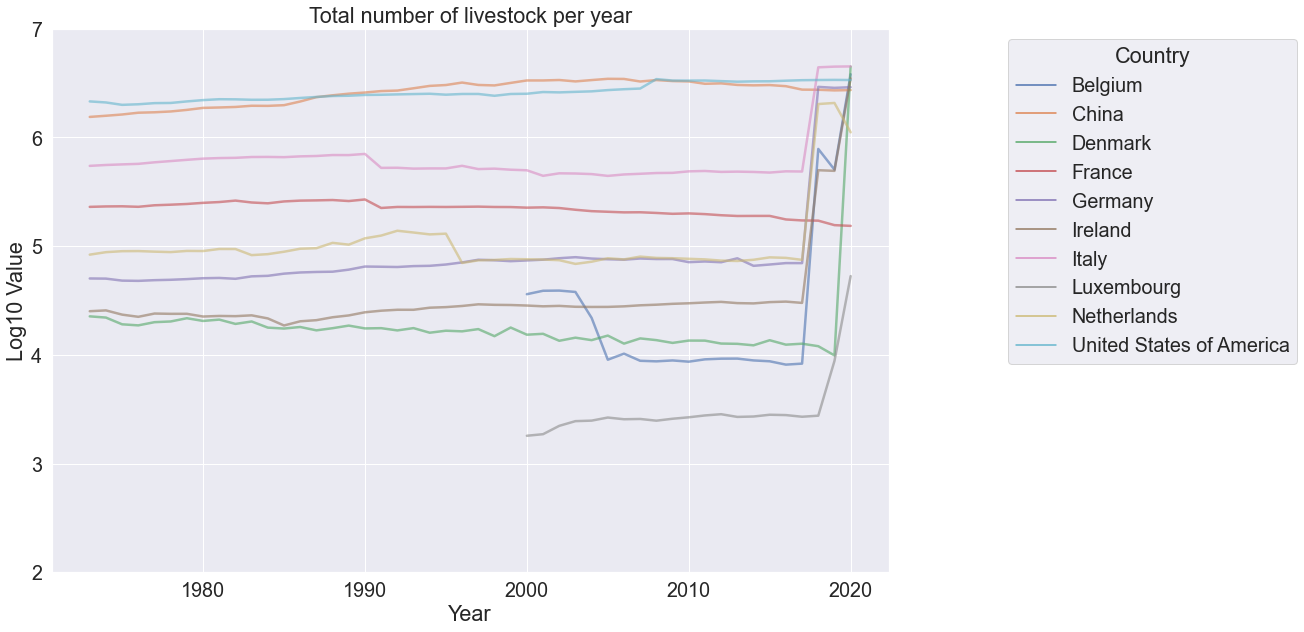

In [92]:
plot_thickens(stock_clean, "Total number of livestock per year", "Year", "Log10 Value",
             2,7)

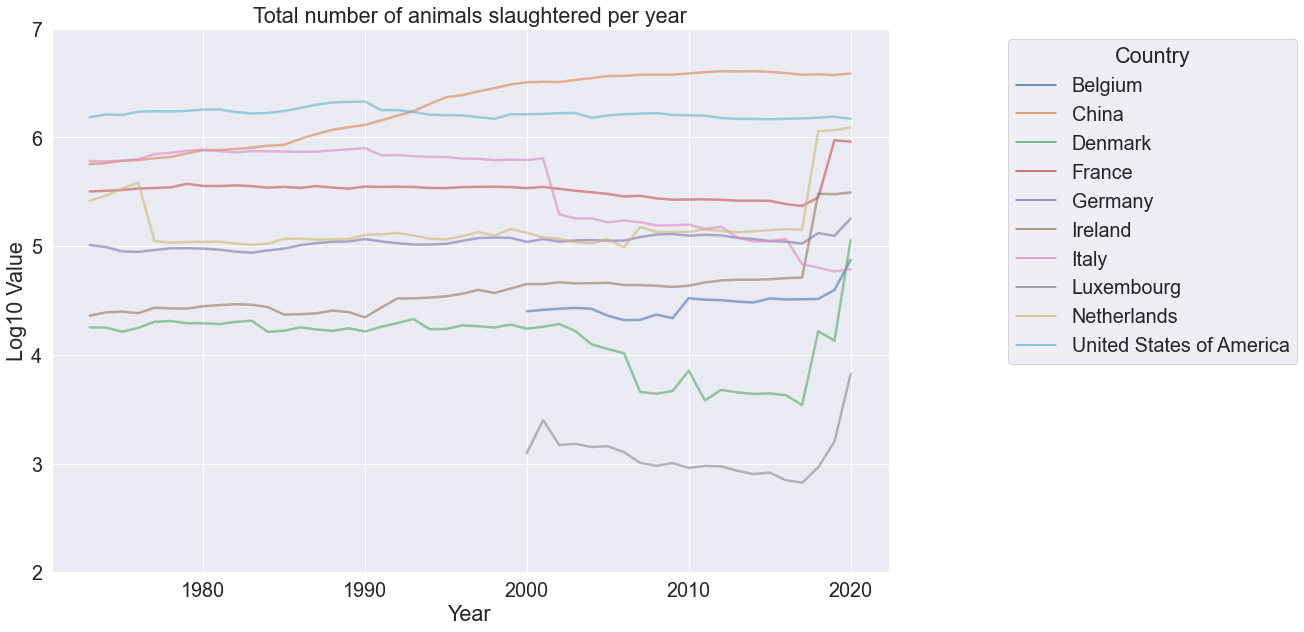

In [93]:
plot_thickens(slaughter_clean, "Total number of animals slaughtered per year", "Year", "Log10 Value",
             2,7)

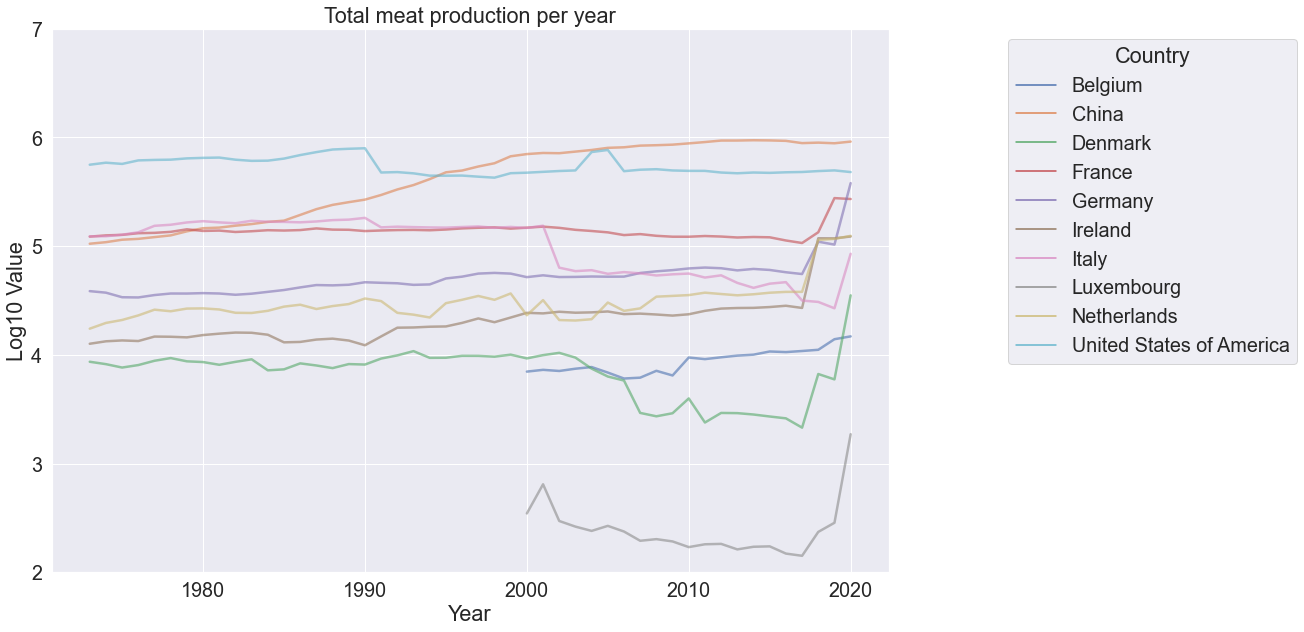

In [94]:
plot_thickens(meat_clean, "Total meat production per year", "Year", "Log10 Value",
             2,7)

## Animals Slaughtered per year

### Cattle

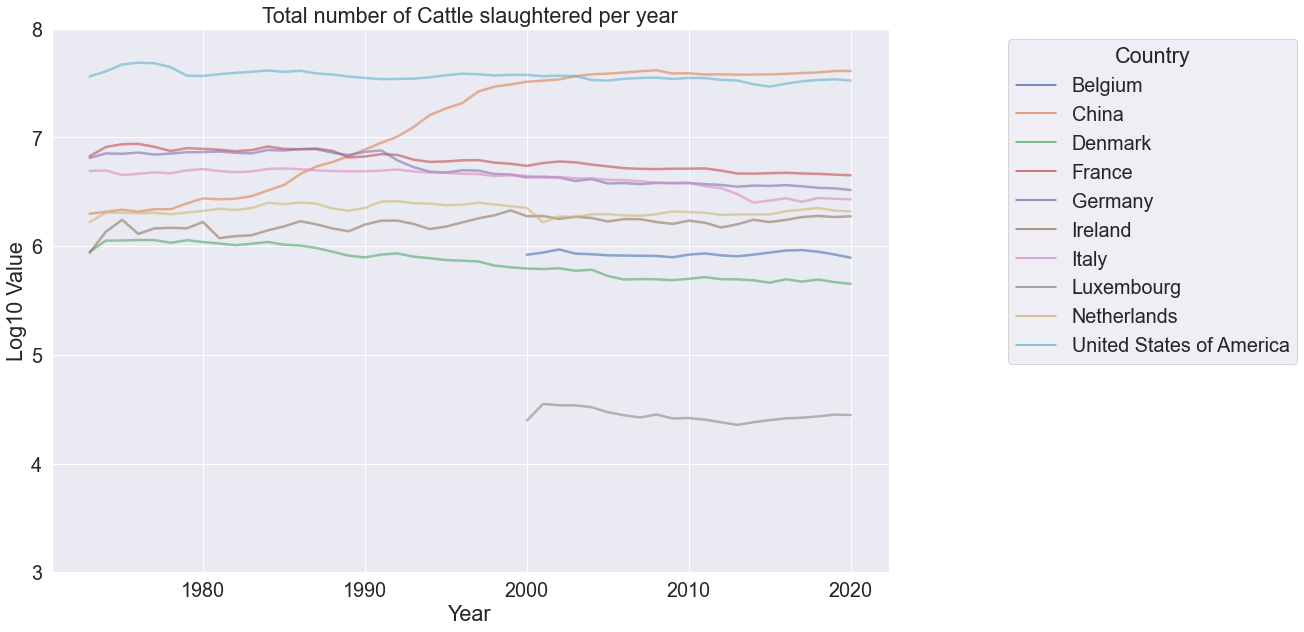

In [95]:
plot_thickens(slaughter_clean.loc[(slaughter_clean['Item'] == "Cattle")],
              "Total number of Cattle slaughtered per year", "Year", "Log10 Value",
             3,8)

### Sheep

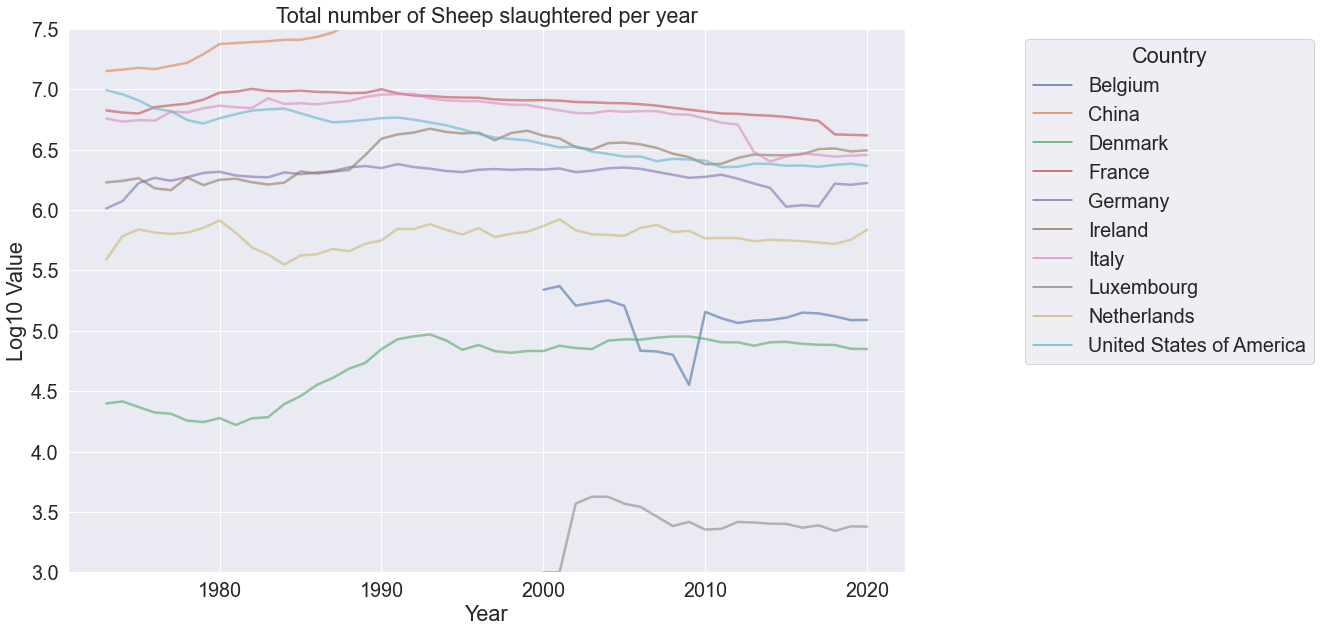

In [96]:
plot_thickens(slaughter_clean.loc[(slaughter_clean['Item'] == "Sheep")],
              "Total number of Sheep slaughtered per year", "Year", "Log10 Value",
             3,7.5)

### Pigs

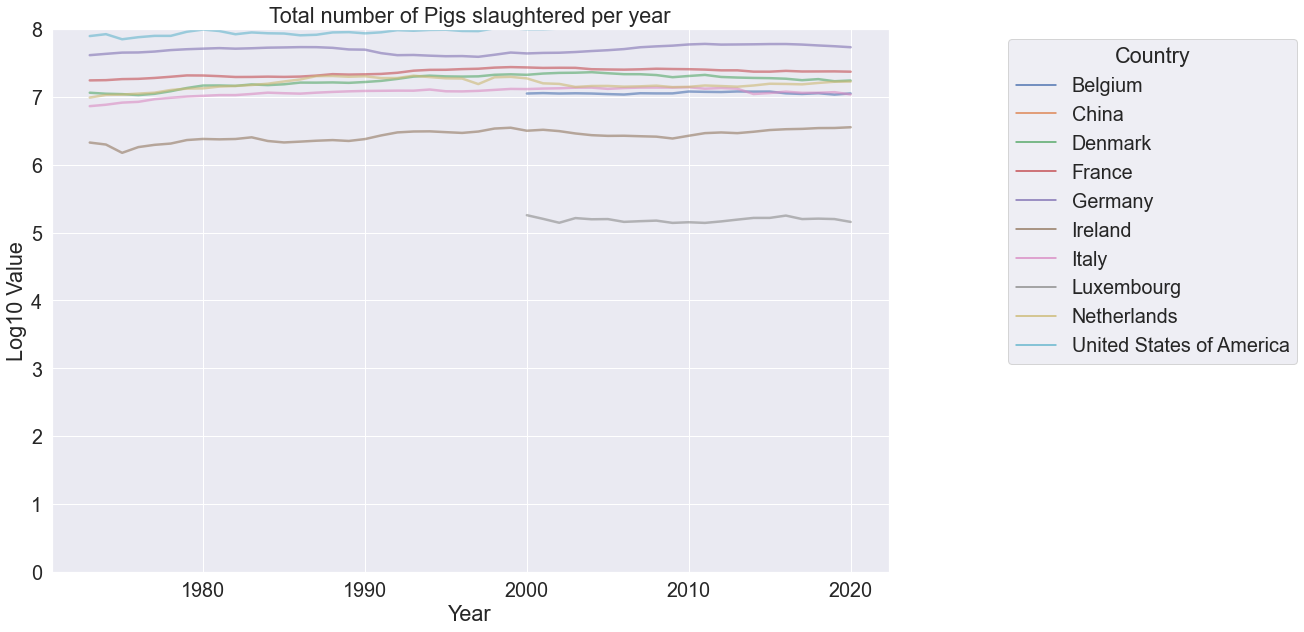

In [97]:
plot_thickens(slaughter_clean.loc[(slaughter_clean['Item'] == "Pig")],
              "Total number of Pigs slaughtered per year", "Year", "Log10 Value",0,8)

## Meat produced

### Cattle

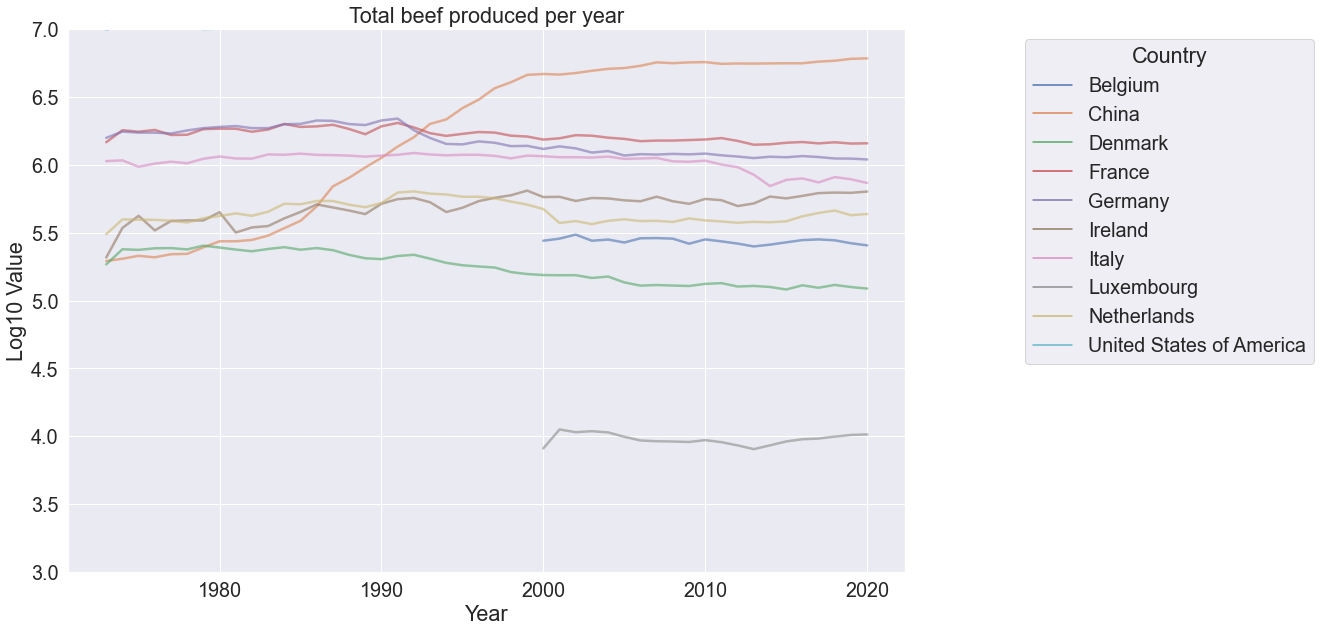

In [98]:
plot_thickens(meat_clean.loc[(meat_clean['Item'] == "Cattle")],
              "Total beef produced per year", "Year", "Log10 Value",3,7)

### Mutton

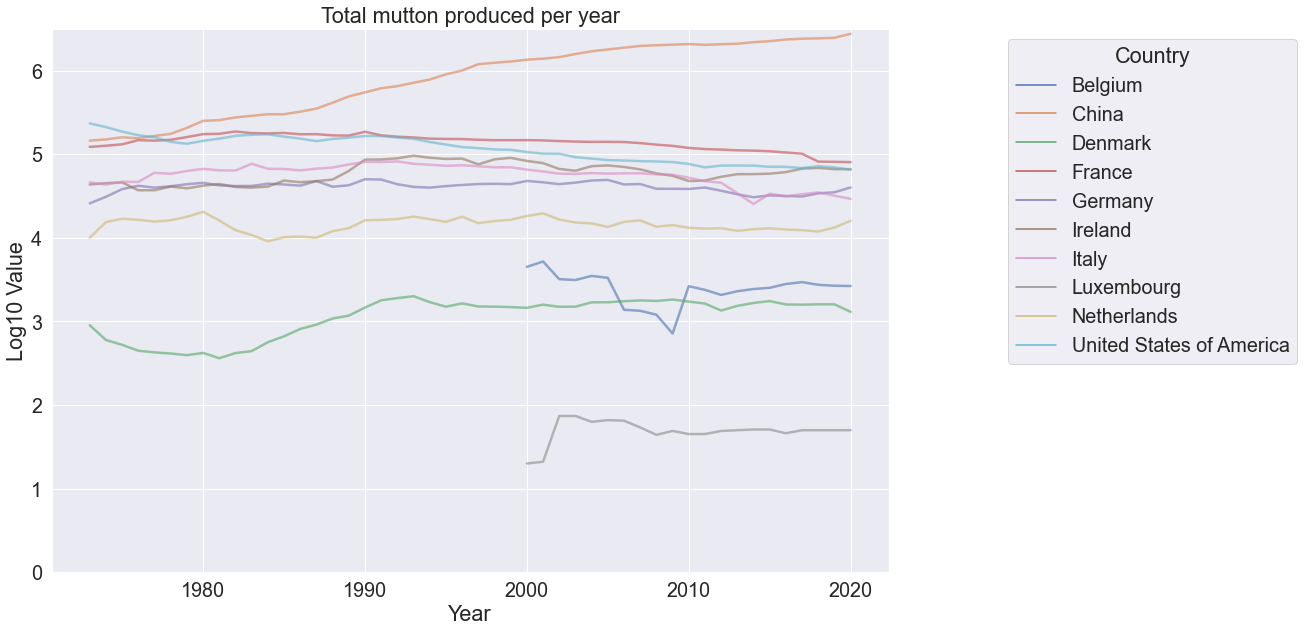

In [99]:
plot_thickens(meat_clean.loc[(meat_clean['Item'] == "Sheep")],
              "Total mutton produced per year", "Year", "Log10 Value",0,6.5)

### Pork

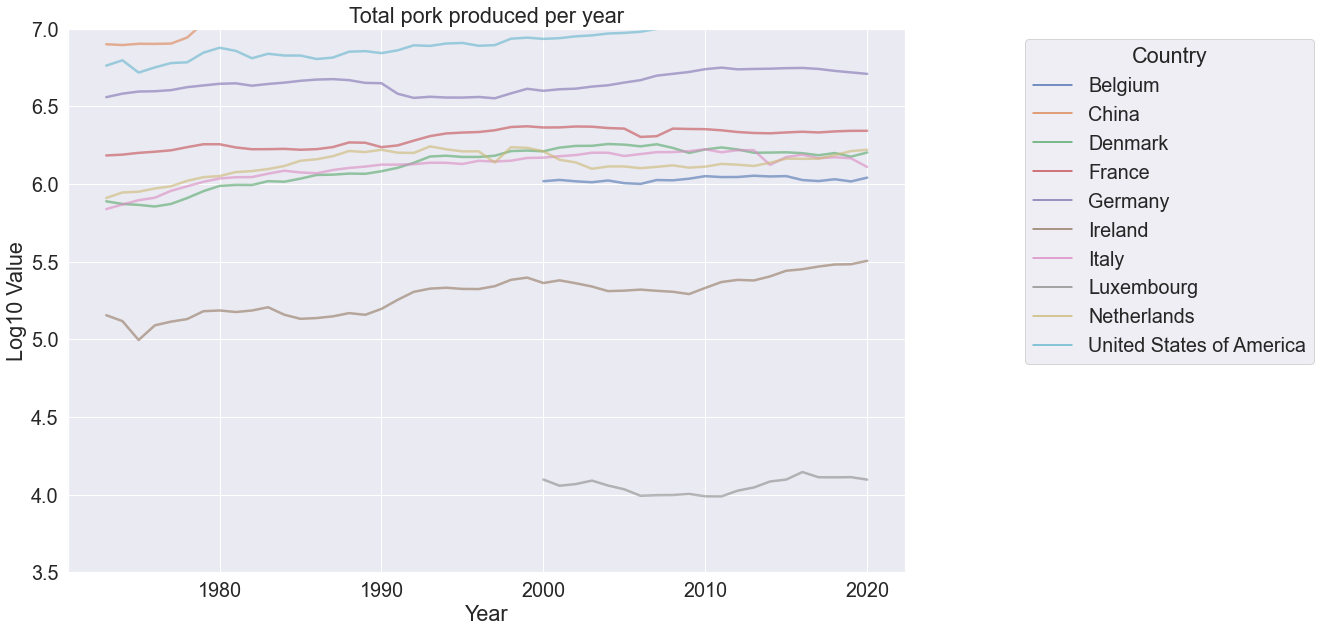

In [100]:
plot_thickens(meat_clean.loc[(meat_clean['Item'] == "Pig")],
              "Total pork produced per year", "Year", "Log10 Value",3.5,7)

# Statistical analysis 

In [101]:
# Creation of a function to create QQ plots to visualise distributions
# Includes R-squared to measure the line fit
import pingouin as pg

def see_normality(dataframe):
    '''This function takes a dataframe as input and plots the normality on 
    a QQ plot, it also gives the r2 squared value which measures line fit'''
    ax = pg.qqplot(dataframe, dist='norm', figsize=(10,10))
    sns.set(font_scale = 1.4); 

## Testing normality of the distributions

### Animal Slaughter data 

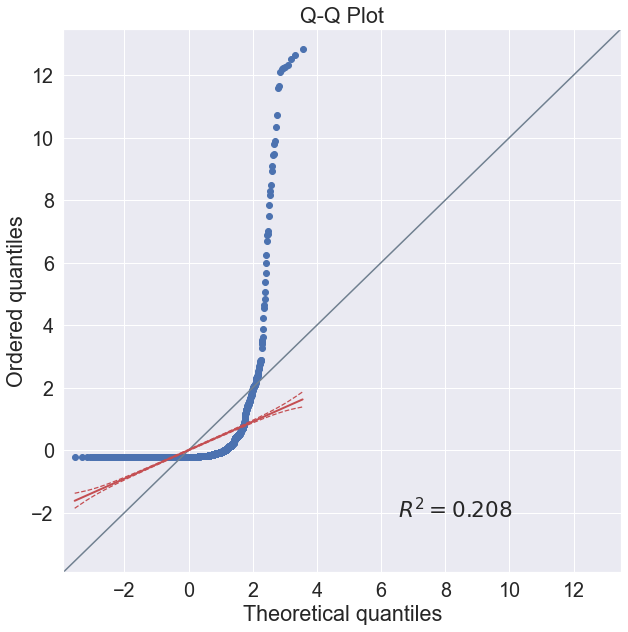

In [102]:
#Normality plot.

see_normality(slaughter_clean.Value)

To compliment the QQ plot, next we perform a Shapiro-Wilks test to statistically confirm if the distribution is normal or non-normal.

<b>The null hypothesis (H0) for the Shapiro-Wilk test is that "a variable is normally distributed in a population".</b>

In [103]:
# Performing a Shapiro wilks test to confirm the data if the data is or is not
# normally distributed.

stats.shapiro(slaughter_clean.Value)

ShapiroResult(statistic=0.20885485410690308, pvalue=0.0)

The QQ plot does not show a linear plot typically associated with normal distributions. In addition, the Shapiro-Wilks test
has a p-value below 0.05 so we reject the null hypothesis that "the variable is normally distributed"

Thus, we conclude the distribution of the animal slaughter data is non-normal.

### Meat production data 

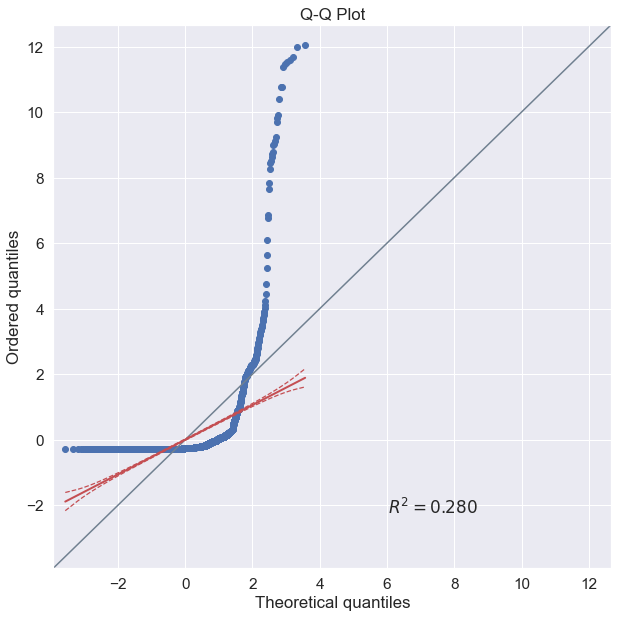

In [104]:
see_normality(meat_clean.Value)

In [105]:
stats.shapiro(meat_clean.Value)

ShapiroResult(statistic=0.2809247374534607, pvalue=0.0)

The QQ plot does not show a linear plot typically associated with normal distributions. In addition, the Shapiro-Wilks test
has a p-value below 0.05 so we reject the null hypothesis that "the variable is normally distributed"

Thus, we conclude the distribution of the meat production data is non-normal.

### Livestock stocking data 

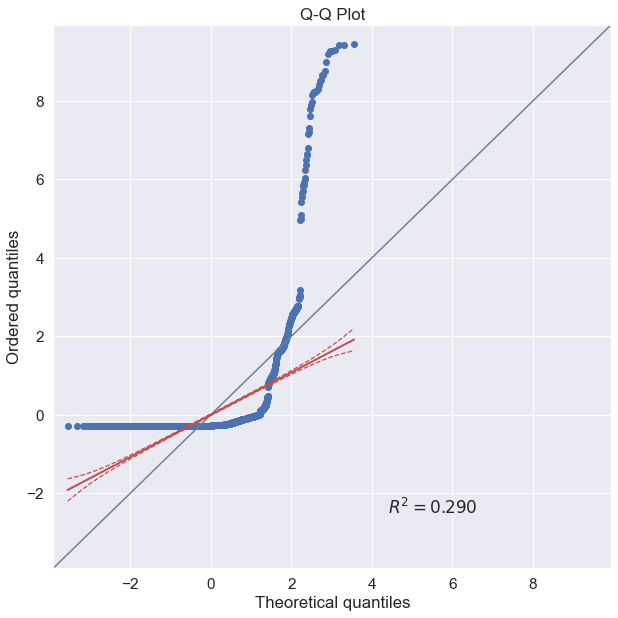

In [106]:
see_normality(stock_clean.Value)

In [107]:
stats.shapiro(stock_clean.Value)

ShapiroResult(statistic=0.29074954986572266, pvalue=0.0)

The QQ plot does not show a linear plot typically associated with normal distributions. In addition, the Shapiro-Wilks test
has a p-value below 0.05 so we reject the null hypothesis that "the variable is normally distributed"

Thus, we conclude the distribution of the livestock stocking data is non-normal.

### Import export data

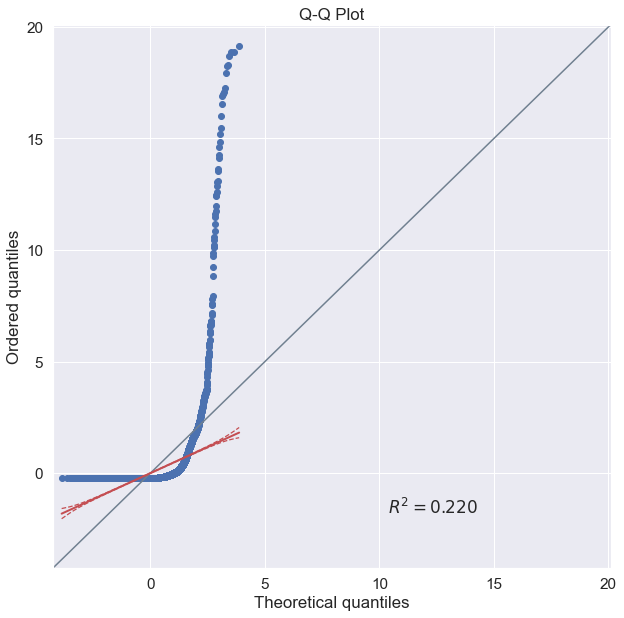

In [108]:
see_normality(imp_exp_clean.Value)

In [109]:
stats.shapiro(imp_exp_clean.Value)

ShapiroResult(statistic=0.22003084421157837, pvalue=0.0)

The QQ plot does not show a linear plot typically associated with normal distributions. In addition, the Shapiro-Wilks test
has a p-value below 0.05 so we reject the null hypothesis that "the variable is normally distributed"

Thus, we normally we would conclude the distribution of the import export data is non-normal.

However, the Scipy stats module has given a warning that the Shapiro-Wilks test 'p-value may not be accurate for datasets containing n > 5,000'. Therefore, we can perform an additional Kolmogorov-Smirnov test (KS-test) to test for normality. 

In addition, we shall test if this is a problem for the other datasets using count().

In [110]:
# Checking all the data sets to see if the >5,000 observations issue affects 
# any data set other than the import / export data
print(f"The animal slaughter dataset count is \n{slaughter_clean.count()}")
print(f"The meat production dataset count is \n{meat_clean.count()}")
print(f"The livestock stocking dataset count is \n{stock_clean.count()}")
print(f"The import export dataset count is \n{imp_exp_clean.count()}")

The animal slaughter dataset count is 
Area        3625
Element     3625
Item        3625
Year        3625
Unit        3625
Value       3625
LogValue    3625
dtype: int64
The meat production dataset count is 
Area        3830
Element     3830
Item        3830
Year        3830
Unit        3830
Value       3830
LogValue    3830
dtype: int64
The livestock stocking dataset count is 
Area        3670
Element     3670
Item        3670
Year        3670
Unit        3670
Value       3670
LogValue    3670
dtype: int64
The import export dataset count is 
Area        12988
Element     12988
Item        12988
Year        12988
Unit        12988
Value       12988
LogValue    12988
dtype: int64


This confirms only the import export data set is too large for the Shapiro Wilks test. Next we can use the Kolmogorov-Smirnov test (KS-test) to re-test the normality of the larger import export data set.

In [111]:
from scipy.stats import kstest, norm
ks_statistic, p_value = kstest(imp_exp_clean.Value, 'norm')
print(ks_statistic, p_value)

0.9836362430216499 0.0


The KS-test confirms the Shapiro-Wilks and QQ plot results that the import export data is not normally distributed.

### Summary of distribution testing 

The distribution of all four imported datasets (slaughter, meat production, livestock, and import/export) is not normal as demonstrated by their QQ plots and the results of the Shapiro-Wilks tests. All four datasets Shapiro-Wilks tests had p value below 0.05 and rejected the Null Hypothesis that the "data is evenly distributed". In addition, as the import_export dataset was too large for an accurate  Shapiro-Wilks (SW) normality test, a KS-test was performed to confirm the distribution results observed by the SW test and the QQ plot. The KS-test confirmed the import export data is also non-normally distributed.

Therefore, we can conclude all four data sets have a non-normal distribution. 

This means data sets cannot be analysed by tests that require a normal distribution. For example, a T-test, ANOVA, Pearson correlation or Linear regression will not be suitable as these require the data to be normally distributed. We must use tests that are appropriate to non-normally distributed data. 

## Data preparation for statistical analysis

For Statistical analysis I intend to compare if there is any difference between Ireland and other European countries in addition to the US and China in animals slaughtered, meat production and livestock stocking densities.


### Taking a subset of the data

Due to the large size of the data set,  a subset of animals and countries shall be selected for statistical analysis. In addition, comparisons will only be performed between the slaughter data and the meat production datasets.

The subsets shall include:

Animals = "Cattle", "Chicken", , "Pig", ", "Sheep"

Countries = "Ireland", "France", "Germany", "Italy", "Netherlands", "China", "USA"

In [112]:
# Creating a function to subset the data sets

def stat_subset(dataframe):
    df = dataframe.loc[(dataframe['Item'] == "Cattle")| 
                                      (dataframe['Item'] == "Chicken")|
                                      (dataframe['Item'] == "Pig")|
                                      (dataframe['Item'] == "Sheep")]
    df = df.loc[(df['Area'] == "Ireland")|
                        (df['Area'] == "France")|
                        (df['Area'] == "Germany")|
                        (df['Area'] == "Italy")|
                        (df['Area'] == "Netherlands")|
                        (df['Area'] == "China")|
                        (df['Area'] == "United States of America")]
    return df

In [113]:
slaughter_subset = stat_subset(slaughter_clean)
meat_subset = stat_subset(meat_clean)
livestock_subset = stat_subset(stock_clean)

In [114]:
# Testing that the dataframes have been properly subsetted by the function

print(f"Slaughter countries:{slaughter_subset.Item.unique()}\n")
print(f"Slaughter animals:{slaughter_subset.Area.unique()}\n")
print(f"Meat production countries:{meat_subset.Item.unique()}\n")
print(f"Meat production animals:{meat_subset.Area.unique()}\n")
print(f"Livestock countries:{livestock_subset.Item.unique()}\n")
print(f"Livestock animals:{livestock_subset.Area.unique()}\n")

Slaughter countries:['Cattle' 'Chicken' 'Pig' 'Sheep']

Slaughter animals:['China' 'France' 'Germany' 'Ireland' 'Italy' 'Netherlands'
 'United States of America']

Meat production countries:['Cattle' 'Chicken' 'Pig' 'Sheep']

Meat production animals:['China' 'France' 'Germany' 'Ireland' 'Italy' 'Netherlands'
 'United States of America']

Livestock countries:['Cattle' 'Chicken' 'Pig' 'Sheep']

Livestock animals:['China' 'France' 'Germany' 'Ireland' 'Italy' 'Netherlands'
 'United States of America']



### Pivoting the dataframes

In order to carry out the statistical analysis of Ireland versus other countries, the data first needs to be pivoted to so that each countries values are contained in a column


Creating a function to pivot the subsetted datasets so that each countries
values are in their own column

def make_pivot(dataframe):
    x = pd.pivot_table(data=dataframe, index=["Item", "Year"], values="Value", columns="Area")
    return x

In [115]:
# Creating a function to pivot the subsetted datasets so that each countries
# values are in their own column

def make_pivot(dataframe):
    '''This function takes a data frame as input, and then pivots the df so that each
    countrys values are within their own column with animal and year in the rows as index.'''
    x = pd.pivot_table(data=dataframe, index=["Year","Item"], values="Value", columns=["Area",])
    return x

In [116]:
# Placing each countries value inside a column

slaughter_stats = make_pivot(slaughter_subset)
meat_stats = make_pivot(meat_subset)
livestock_stats = make_pivot(livestock_subset)

# Checking the column order
slaughter_stats.head()

Area                China      France     Germany    Ireland      Italy  \
Year Item                                                                 
1973 Cattle     1987666.0   6725000.0   6467844.0   869900.0  4917800.0   
     Chicken     747639.0    429658.0    351731.0    24300.0   493000.0   
     Pig      175836294.0  17352000.0  40791840.0  2111000.0  7245000.0   
     Sheep     14100025.0   6660000.0   1029000.0  1690000.0  5709000.0   
1974 Cattle     2070484.0   8164000.0   7130642.0  1358000.0  4969751.0   

Area          Netherlands  United States of America  
Year Item                                            
1973 Cattle     1667141.0                36402000.0  
     Chicken     282500.0                 3252090.0  
     Pig        9695142.0                77890000.0  
     Sheep       388012.0                 9799000.0  
1974 Cattle     2033582.0                40499008.0

In [117]:
slaughter_stats.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 192 entries, (1973, 'Cattle') to (2020, 'Sheep')
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   China                     192 non-null    float64
 1   France                    192 non-null    float64
 2   Germany                   192 non-null    float64
 3   Ireland                   192 non-null    float64
 4   Italy                     192 non-null    float64
 5   Netherlands               192 non-null    float64
 6   United States of America  192 non-null    float64
dtypes: float64(7)
memory usage: 11.4+ KB


### Re-ordering the columns

In [118]:
# reordering the new columns so that Ireland followed by EU countries are first, then China and
# the United States of America

columns =["Ireland", "France", "Germany", "Italy", "Netherlands", "China", "United States of America"]

slaughter_stats = slaughter_stats.reindex(columns=columns)
meat_stats = meat_stats.reindex(columns=columns)
livestock_stats = livestock_stats.reindex(columns=columns)

# Testing the re-order worked
slaughter_stats.head()

Area            Ireland      France     Germany      Italy  Netherlands  \
Year Item                                                                 
1973 Cattle    869900.0   6725000.0   6467844.0  4917800.0    1667141.0   
     Chicken    24300.0    429658.0    351731.0   493000.0     282500.0   
     Pig      2111000.0  17352000.0  40791840.0  7245000.0    9695142.0   
     Sheep    1690000.0   6660000.0   1029000.0  5709000.0     388012.0   
1974 Cattle   1358000.0   8164000.0   7130642.0  4969751.0    2033582.0   

Area                China  United States of America  
Year Item                                            
1973 Cattle     1987666.0                36402000.0  
     Chicken     747639.0                 3252090.0  
     Pig      175836294.0                77890000.0  
     Sheep     14100025.0                 9799000.0  
1974 Cattle     2070484.0                40499008.0

### Dealing with NAN's created by pivoting

Testing the new dataframes for null values created by the pivot table function

In [119]:
calc_percent_missing(slaughter_stats.isnull().sum(), len(slaughter_stats))

The percentage of missing values is:
Area
Ireland                     0.0
France                      0.0
Germany                     0.0
Italy                       0.0
Netherlands                 0.0
China                       0.0
United States of America    0.0
dtype: float64


In [120]:
calc_percent_missing(meat_stats.isnull().sum(), len(meat_stats))

The percentage of missing values is:
Area
Ireland                     0.0
France                      0.0
Germany                     0.0
Italy                       0.0
Netherlands                 0.0
China                       0.0
United States of America    0.0
dtype: float64


The pivot_table has not introduced any null values in the meat or slaughter dataframes.

In [121]:
livestock_stats.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 192 entries, (1973, 'Cattle') to (2020, 'Sheep')
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Ireland                   189 non-null    float64
 1   France                    192 non-null    float64
 2   Germany                   189 non-null    float64
 3   Italy                     189 non-null    float64
 4   Netherlands               190 non-null    float64
 5   China                     192 non-null    float64
 6   United States of America  192 non-null    float64
dtypes: float64(7)
memory usage: 11.4+ KB


In [122]:
calc_percent_missing(livestock_stats.isnull().sum(), len(livestock_stats))

The percentage of missing values is:
Area
Ireland                     1.56
France                      0.00
Germany                     1.56
Italy                       1.56
Netherlands                 1.04
China                       0.00
United States of America    0.00
dtype: float64


Four countries have approximately 1% to 1.5% missing values in the livestock data. As this is such a small %, I will drop the missing values as this will introduce minimal error.

In [123]:
#Filtering out Zeros and NaN's

livestock_stats = livestock_stats.dropna()

In [124]:
# Testing the NaN's have been dropped

calc_percent_missing(livestock_stats.isnull().sum(), len(livestock_stats))

The percentage of missing values is:
Area
Ireland                     0.0
France                      0.0
Germany                     0.0
Italy                       0.0
Netherlands                 0.0
China                       0.0
United States of America    0.0
dtype: float64


## Five statistic summaries for each country

In [125]:
slaughter_stats.describe()

Area,Ireland,France,Germany,Italy,Netherlands,China,United States of America
count,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02
mean,1.823458e+06,9.400710e+06,1.432396e+07,5.695022e+06,4.699347e+06,1.346251e+08,3.659682e+07
std,1.263665e+06,8.400309e+06,2.073453e+07,4.256959e+06,6.506169e+06,2.009695e+08,3.863719e+07
min,2.120000e+04,4.296580e+05,3.120000e+05,3.721900e+05,2.483300e+05,7.476390e+05,2.257500e+06
25%,6.781240e+05,3.337633e+06,9.385325e+05,2.027303e+06,5.410750e+05,6.943555e+06,5.554976e+06
50%,1.804500e+06,7.010488e+06,2.837941e+06,4.961246e+06,1.246500e+06,3.781689e+07,1.955965e+07
75%,2.839600e+06,1.186552e+07,1.550445e+07,8.443314e+06,4.370786e+06,1.700157e+08,5.401450e+07
max,4.701000e+06,2.722100e+07,5.973568e+07,1.376435e+07,2.034500e+07,7.449179e+08,1.316390e+08


It is difficult to view the 5 stat summary as the scales are too large therefore I will convert them to Log10 values and re-view them.

In [126]:
def summary_pivot(dataframe):
    '''This function takes a data frame as input, and then pivots the df so that each
    countrys Logvalues are within their own column with animal and year in the rows as index.'''
    x = pd.pivot_table(data=dataframe, index=["Year","Item"], values="LogValue", columns=["Area",])
    return x

In [127]:
Slaughter_summary = summary_pivot(slaughter_clean)
Livestock_summary = summary_pivot(stock_clean)
Meat_summary = summary_pivot(meat_clean)

### Slaughter data - log scale

In [128]:
Slaughter_summary.describe()

Area,Belgium,China,Denmark,France,Germany,Ireland,Italy,Luxembourg,Netherlands,United States of America
count,165.000000,480.000000,379.000000,473.000000,476.000000,375.000000,406.000000,138.000000,367.000000,366.000000
mean,4.462379,6.277452,4.113999,5.518425,5.037488,4.575873,5.518131,3.053614,5.154541,6.218663
std,1.696280,1.650582,1.903278,1.255995,1.436827,1.555448,1.347004,1.351969,1.262121,1.213414
min,0.845098,2.204120,0.000000,2.655138,2.559907,2.204120,0.698970,0.602060,2.883661,4.040998
25%,3.106531,5.507028,3.003439,4.686001,4.142937,3.169069,4.557024,1.838715,3.924563,5.226427
50%,4.800511,6.221016,4.255827,5.689472,4.447816,4.397940,5.677467,2.661787,5.458638,6.382503
75%,5.893568,7.588260,5.658149,6.768342,6.309828,6.258363,6.687411,4.415682,6.276564,7.520971
max,7.076094,8.872108,7.359879,7.434904,7.776234,6.672190,7.138756,5.255434,7.308458,8.119385


### Stocking data - log scale

In [129]:
Livestock_summary.describe()

Area,Belgium,China,Denmark,France,Germany,Ireland,Italy,Luxembourg,Netherlands,United States of America
count,180.000000,480.000000,379.000000,478.000000,462.000000,400.000000,372.000000,142.000000,393.000000,384.000000
mean,4.181800,6.412740,4.216903,5.343182,4.847088,4.466659,5.762802,3.453854,4.977230,6.416044
std,1.834081,1.811912,1.862973,1.494919,1.883409,1.792169,1.084624,1.507552,1.519746,1.280729
min,0.301030,1.908485,0.301030,2.499687,1.397940,1.662758,3.758458,0.301030,2.475671,3.531479
25%,2.371068,5.304481,2.528915,4.306076,3.184235,2.849563,5.000000,2.070820,3.112270,5.831127
50%,4.517637,6.685188,4.308500,5.396949,5.084102,4.180410,5.976097,3.683871,5.008016,6.705222
75%,5.179212,7.991616,6.176091,7.005012,6.467925,6.236317,6.908163,4.916321,6.274620,7.358032
max,6.867381,8.687300,7.137464,7.381603,7.572203,6.878234,7.063281,5.312163,7.156814,8.120666


### Meat production data - log scale

In [130]:
Meat_summary.describe()

Area,Belgium,China,Denmark,France,Germany,Ireland,Italy,Luxembourg,Netherlands,United States of America
count,165.000000,528.000000,424.000000,473.000000,517.000000,375.000000,404.000000,153.000000,379.000000,412.000000
mean,3.936709,5.601484,3.823483,5.136669,4.696979,4.307196,4.975868,2.351899,4.472570,5.732642
std,1.572458,1.168115,1.366738,0.887649,1.202177,0.989633,1.094604,1.197036,1.227563,1.093535
min,0.698970,3.199481,0.301030,3.375481,2.000000,1.690196,1.397940,0.000000,2.238046,3.781899
25%,2.602060,4.998809,2.903090,4.130334,3.839352,3.301030,4.598073,1.447158,3.381259,4.771324
50%,3.716003,5.721526,3.531734,5.185347,4.605973,4.536558,5.215769,2.350248,4.230704,5.384198
75%,5.516850,6.381098,5.165615,6.027067,5.664172,5.125355,5.915492,3.934145,5.679829,6.908554
max,6.053298,7.760889,6.257559,6.439773,6.749433,5.808751,6.223496,4.145569,6.242238,7.311547


## Kruskal-Wallis Test

In order to compare Ireland to the other countries listed in the four datasets a Kruskal-Wallis (KW) test was selected for the following reasons:

- The four datasets have non-normal distributions
- Each of the datasets has more than two groups.
- The value parameter is ordinal
- The scale is the same in all the samples
- The samples (countries) are independent of each other
- The unit of measurement of all countries in the datasets are the same
- We do not need to assume homogeneity between the variables, so the level of variance does not need to be tested.

The Null Hypothesis for the Kruskall-Wall test is:

<b> H0: The population median of all the groups tested is equal </b>

In [131]:
# Creation of a function to perform a Kruskal Wallis test comparing all countries
# in the dataframe

def krusk(df):
    '''This function takes a dataframe as input, and then performs a Kruskall-
    Wallis test between Ireland and six other countries and prints the result'''
    result = stats.kruskal(df.Ireland, df.France, df.Germany, df.Italy, df.Netherlands,
                  df.China, df['United States of America'])
    if result.pvalue <= 0.05:
        print(f"The p-value is {result.pvalue}, the null hypothesis is rejected")
        print(result)
    else:
        print(f"The p-value is {result.pvalue}, the null hypothesis is accepted")
        print(result)

### Test 1: Comparing the total slaughter of 'cattle, pigs, chickens and sheep' between all countries

In [132]:
krusk(slaughter_stats)

The p-value is 4.934261552794357e-96, the null hypothesis is rejected
KruskalResult(statistic=459.28111693570287, pvalue=4.934261552794357e-96)


The null hypothesis was rejected by the KW test so the median slaughter values for 'Cattle, chickens, pigs and sheep' of these countries is not equal.

### Test 2 Comparing the total meat production of 'cattle, pigs, chickens and sheep' between all countries

In [133]:
krusk(meat_stats)

The p-value is 1.7338116519998716e-100, the null hypothesis is rejected
KruskalResult(statistic=479.96904501046214, pvalue=1.7338116519998716e-100)


The null hypothesis was rejected by the KW test so the median of total meat production of 'cattle, pigs, chickens and sheep' between these countries is not equal.

### Test 3 Comparing the total livestock numbers of 'cattle, pigs, chickens and sheep' between all countries

In [134]:
krusk(livestock_stats)

The p-value is 8.090650781475436e-91, the null hypothesis is rejected
KruskalResult(statistic=435.0504216612527, pvalue=8.090650781475436e-91)


The null hypothesis was rejected by the KW test so the median of animal stocking densities of 'cattle, pigs, chickens and sheep' between these countries is not equal.

## U-Mann Whitmann test

While the Kruskal-Wallis Test was appropriate to compare all countries totals for animals slaughtered and meat production, it only tells us if the median of the group(s) tested are equal or not. It does not allow us to compare two countries on a case by case basis.

Therefore, if we wanted to compare Ireland to the other countries individually, a U-Mann Whitney test can be used. In addition, as there are four animal types in both datasets ("Cattle, chickens, pigs and sheep), we can also compare by each animal between Ireland and another country. This will give a more detailed breakdown of how Ireland compares to other countries on the production and slaughter of individual animal species.

In order to compare Ireland to the other countries listed in the four datasets a U-Mann Whitman (Mann Whitney) test was selected for the following reasons:

- The four datasets have non-normal distributions
- The value parameter is ordinal
- The samples (countries) are independent of each other
- The unit of measurement of all countries in the datasets are the same
- We do not need to assume homogeneity between the variables, so the level of variance does not need to be tested.
- Here we are comparing Ireland versus one other country (2 groups)

The Null Hypothesis for the Mann Witney test is:

<b> H0: The probability is 50% that a randomly drawn member of the first population will exceed a member of the second population </b>

In [135]:
from scipy.stats import mannwhitneyu

# creation of a function to perform a mann whitney test on Ireland versus
# the other countries in the dataframe and print the result

def manw(df):
    '''This function takes a dataframe as input, loops through all the countries
    in the dfcolumns and does a mann whitney versus Irelands data'''
    for country in df.iloc[:,:]:
        if country != "Ireland":
            result = mannwhitneyu(df.Ireland, df[country])
            if result.pvalue <= 0.05:
                print(f"The p-value for Ireland vs {country} is {result.pvalue}, the null hypothesis is rejected")
                print(f"round{result}\n")
            else:
                print(f"The p-value for Ireland vs {country} is {result.pvalue}, the null hypothesis is accepted")
                print(f"{result}\n")

### Slaughter data

#### Tests 4 to 9: Comparison of total animals slaughtered between Ireland and other countries

In [136]:
manw(slaughter_stats)

The p-value for Ireland vs France is 4.0920354213501657e-26, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=6936.0, pvalue=4.0920354213501657e-26)

The p-value for Ireland vs Germany is 1.7915338692715844e-10, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=11495.0, pvalue=1.7915338692715844e-10)

The p-value for Ireland vs Italy is 2.130273414931085e-22, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=7844.0, pvalue=2.130273414931085e-22)

The p-value for Ireland vs Netherlands is 0.35951070953366304, the null hypothesis is accepted
MannwhitneyuResult(statistic=17435.0, pvalue=0.35951070953366304)

The p-value for Ireland vs China is 2.3541701458171394e-44, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=3238.0, pvalue=2.3541701458171394e-44)

The p-value for Ireland vs United States of America is 1.1104926567790573e-55, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=1336.0, pvalue=1.1104926567

#### Tests 10 to 15: Comparison of total cattle slaughtered between Ireland and other countries

In [137]:
# Creating a function to perform an Mann Whitney on Ireland versus other countries 
# data for specific animals

def animal_manw(dataframe, animal):
    '''This function takes a dataframe and animal name as input and then
    filters out the specific animal into a new dataframe for all countries.
    The function then passes this new dataframe into my Mann Whitney function'''
    columns =["Ireland", "France", "Germany", "Italy", "Netherlands", "China", "United States of America"]
    '''This function takes a dataframe and animal name as input and then
    filters out the specific animal into a new dataframe for all countires.
    The function then pivots this new dataframe so that it can be analysed 
    via Mann Whitney'''
    df = dataframe.loc[(dataframe['Item'] == animal)]
    df = make_pivot(df)
    df = df.reindex(columns=columns)
    df = df.dropna(axis = 0) # This drop has been added as the pivot creates 3 NaN values for Chickens
    manw(df)

In [138]:
animal_manw(slaughter_subset, 'Cattle')

The p-value for Ireland vs France is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs Germany is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs Italy is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs Netherlands is 5.829207045216664e-15, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=86.0, pvalue=5.829207045216664e-15)

The p-value for Ireland vs China is 3.902798734084917e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=3.0, pvalue=3.902798734084917e-17)

The p-value for Ireland vs United States of America is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)



#### Tests 16 to 21: Comparison of total chicken slaughtered between Ireland and other countries

In [139]:
animal_manw(slaughter_subset, 'Chicken')

The p-value for Ireland vs France is 3.226705239911368e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.226705239911368e-17)

The p-value for Ireland vs Germany is 3.222758435253053e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.222758435253053e-17)

The p-value for Ireland vs Italy is 3.225125970274858e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.225125970274858e-17)

The p-value for Ireland vs Netherlands is 3.223547431055488e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.223547431055488e-17)

The p-value for Ireland vs China is 3.226705239911368e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.226705239911368e-17)

The p-value for Ireland vs United States of America is 3.226705239911368e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.226705239911368e-17)



#### Tests 22 to 27: Comparison of total Pig slaughtered between Ireland and other countries

In [140]:
animal_manw(slaughter_subset, 'Pig')

The p-value for Ireland vs France is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs Germany is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs Italy is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs Netherlands is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs China is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs United States of America is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)



#### Tests 28 to 33: Comparison of total sheep slaughtered between Ireland and other countries

In [141]:
animal_manw(slaughter_subset, 'Sheep')

The p-value for Ireland vs France is 1.348267203098616e-16, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=23.0, pvalue=1.348267203098616e-16)

The p-value for Ireland vs Germany is 6.044939195325733e-06, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=1770.0, pvalue=6.044939195325733e-06)

The p-value for Ireland vs Italy is 4.974066752442029e-12, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=209.0, pvalue=4.974066752442029e-12)

The p-value for Ireland vs Netherlands is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=2304.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs China is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs United States of America is 0.00010136227547832888, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=621.0, pvalue=0.0001013622754783

### Meat production data

#### Tests 34 to 39 comparison of total meat production between Ireland and other countries

In [142]:
manw(meat_stats)

The p-value for Ireland vs France is 1.5814740925584637e-38, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=4315.0, pvalue=1.5814740925584637e-38)

The p-value for Ireland vs Germany is 3.5940136864592823e-16, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=9566.5, pvalue=3.5940136864592823e-16)

The p-value for Ireland vs Italy is 2.3683627477341344e-24, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=7357.5, pvalue=2.3683627477341344e-24)

The p-value for Ireland vs Netherlands is 5.01321938781441e-10, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=11668.5, pvalue=5.01321938781441e-10)

The p-value for Ireland vs China is 1.4565922933162351e-52, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=1838.0, pvalue=1.4565922933162351e-52)

The p-value for Ireland vs United States of America is 1.58229659473187e-35, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=4902.5, pvalue=1.5822

#### Tests 40 to 45 comparison of beef production between Ireland and other countries

In [143]:
animal_manw(meat_subset, 'Cattle')

The p-value for Ireland vs France is 3.232238440262269e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.232238440262269e-17)

The p-value for Ireland vs Germany is 3.233821000709514e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.233821000709514e-17)

The p-value for Ireland vs Italy is 3.233821000709514e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.233821000709514e-17)

The p-value for Ireland vs Netherlands is 0.004676759700057197, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=1538.5, pvalue=0.004676759700057197)

The p-value for Ireland vs China is 0.0001538733087172085, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=635.0, pvalue=0.0001538733087172085)

The p-value for Ireland vs United States of America is 3.233821000709514e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.233821000709514e-17)



#### Tests 46 to 51 comparison of chicken production between Ireland and other countries

In [144]:
animal_manw(meat_subset, 'Chicken')

The p-value for Ireland vs France is 3.225125970274858e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.225125970274858e-17)

The p-value for Ireland vs Germany is 3.225125970274858e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.225125970274858e-17)

The p-value for Ireland vs Italy is 3.225125970274858e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.225125970274858e-17)

The p-value for Ireland vs Netherlands is 3.223547431055488e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.223547431055488e-17)

The p-value for Ireland vs China is 3.225125970274858e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.225125970274858e-17)

The p-value for Ireland vs United States of America is 3.225125970274858e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.225125970274858e-17)



#### Tests 52 to 57 comparison of pork production between Ireland and other countries

In [145]:
animal_manw(meat_subset, 'Pig')

The p-value for Ireland vs France is 3.233821000709514e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.233821000709514e-17)

The p-value for Ireland vs Germany is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs Italy is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs Netherlands is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs China is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs United States of America is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)



#### Tests 58 to 63 comparison of mutton production between Ireland and other countries

In [146]:
animal_manw(meat_subset, 'Sheep')

The p-value for Ireland vs France is 2.0693785817290193e-16, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=30.0, pvalue=2.0693785817290193e-16)

The p-value for Ireland vs Germany is 1.1602847877212211e-09, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=1983.0, pvalue=1.1602847877212211e-09)

The p-value for Ireland vs Italy is 0.4955685684687611, the null hypothesis is accepted
MannwhitneyuResult(statistic=1245.5, pvalue=0.4955685684687611)

The p-value for Ireland vs Netherlands is 3.233029628985044e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=2304.0, pvalue=3.233029628985044e-17)

The p-value for Ireland vs China is 3.233029628985044e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.233029628985044e-17)

The p-value for Ireland vs United States of America is 6.110445162237452e-12, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=213.0, pvalue=6.110445162237452e-12)



## Livestock Stocking data

#### Tests 64 to 69 comparison of total animal livestock numbers between Ireland and other countries

In [147]:
manw(livestock_stats)

The p-value for Ireland vs France is 1.453600696248324e-26, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=6530.0, pvalue=1.453600696248324e-26)

The p-value for Ireland vs Germany is 2.809293810517495e-11, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=10790.0, pvalue=2.809293810517495e-11)

The p-value for Ireland vs Italy is 5.970027495673175e-23, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=7383.0, pvalue=5.970027495673175e-23)

The p-value for Ireland vs Netherlands is 0.1695615578972508, the null hypothesis is accepted
MannwhitneyuResult(statistic=16401.0, pvalue=0.1695615578972508)

The p-value for Ireland vs China is 1.3445252746735226e-36, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=4439.0, pvalue=1.3445252746735226e-36)

The p-value for Ireland vs United States of America is 1.1666070754227694e-32, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=5219.0, pvalue=1.1666070754227694

#### Tests 70 to 75 comparison of cattle livestock numbers between Ireland and other countries

In [148]:
animal_manw(livestock_subset, 'Cattle')

The p-value for Ireland vs France is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs Germany is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs Italy is 0.0003848850371357562, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=667.0, pvalue=0.0003848850371357562)

The p-value for Ireland vs Netherlands is 3.233821000709514e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=2304.0, pvalue=3.233821000709514e-17)

The p-value for Ireland vs China is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs United States of America is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)



#### Tests 76 to 81 comparison of chicken livestock numbers between Ireland and other countries

In [149]:
animal_manw(livestock_subset, 'Chicken')

The p-value for Ireland vs France is 3.171917903697072e-16, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.171917903697072e-16)

The p-value for Ireland vs Germany is 3.171034647751228e-16, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.171034647751228e-16)

The p-value for Ireland vs Italy is 3.123681146546909e-16, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.123681146546909e-16)

The p-value for Ireland vs Netherlands is 3.172801391218463e-16, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.172801391218463e-16)

The p-value for Ireland vs China is 3.172801391218463e-16, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.172801391218463e-16)

The p-value for Ireland vs United States of America is 3.172801391218463e-16, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.172801391218463e-16)



#### Tests 82 to 87 comparison of porcine livestock numbers between Ireland and other countries

In [150]:
animal_manw(livestock_subset, 'Pig')

The p-value for Ireland vs France is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs Germany is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs Italy is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs Netherlands is 3.229865971706792e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.229865971706792e-17)

The p-value for Ireland vs China is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs United States of America is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)



#### Tests 88 to 93 comparison of sheep livestock numbers between Ireland and other countries

In [151]:
animal_manw(livestock_subset, 'Sheep')

The p-value for Ireland vs France is 1.348267203098616e-16, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=23.0, pvalue=1.348267203098616e-16)

The p-value for Ireland vs Germany is 7.984046096041935e-08, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=1885.0, pvalue=7.984046096041935e-08)

The p-value for Ireland vs Italy is 1.94760712868985e-16, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=29.0, pvalue=1.94760712868985e-16)

The p-value for Ireland vs Netherlands is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=2304.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs China is 3.234612555475504e-17, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=0.0, pvalue=3.234612555475504e-17)

The p-value for Ireland vs United States of America is 5.057947752443698e-11, the null hypothesis is rejected
roundMannwhitneyuResult(statistic=255.0, pvalue=5.057947752443698e-11)

# Sentiment Analysis

Sentiment data was harvested using a Selenium web scraper that was constructed in the 'Selenium Scrap' Juypter notebook file
submitted with this CA. PLease see this notebook for code using to retrieve sentiment analysis.

Keywords used for this search were: ["beef", "cattle", "mutton", "sheep", "prices", "price", "poultry",
            "CAP", "common agriculutral policy", "pig", "pork", "meat"]

In [152]:
# Importing the sentiment data from the Irish Farmers Association
sentiment_df = pd.read_csv("C:/Users/shaun/OneDrive/MSc Data Analytics/CA2 Semester 1/Data/IFA_Sentiment_data.csv", 
                   low_memory=False)

In [153]:
sentiment_df.head()

,Unnamed: 0,Link,Date,Title,Text
0,0,https://www.ifa.ie/markets-and-prices/beef-she...,13-May-22,Beef & Sheep Update 13th May,Beef Update\nIFA Livestock Committee chairman ...
1,1,https://www.ifa.ie/markets-and-prices/beef-she...,06-May-22,Beef & Sheep Update 6th May,Beef Update\nIFA Livestock Chairman Brendan Go...
2,2,https://www.ifa.ie/markets-and-prices/beef-she...,29-Apr-22,Beef & Sheep Update 29th April,Beef Update\nIFA livestock chair Brendan Golde...
3,3,https://www.ifa.ie/farm-sectors/immediate-fund...,29-Apr-22,Immediate Funding Needed to Safeguard Suckler ...,IFA President Tim Cullinan and Livestock Commi...
4,4,https://www.ifa.ie/markets-and-prices/beef-she...,22-Apr-22,Beef & Sheep Update 22nd April,Beef Update\nIFA livestock chairman Brendan Go...


In [154]:
sentiment_df.columns

Index(['Unnamed: 0', 'Link', 'Date', 'Title', 'Text'], dtype='object')

In [155]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5254 entries, 0 to 5253
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5254 non-null   int64 
 1   Link        5254 non-null   object
 2   Date        5254 non-null   object
 3   Title       5254 non-null   object
 4   Text        5254 non-null   object
dtypes: int64(1), object(4)
memory usage: 205.4+ KB


In [156]:
sentiment_df["Unnamed: 0"].unique()

array([   0,    1,    2, ..., 5251, 5252, 5253], dtype=int64)

In [157]:
sentiment_df.shape

(5254, 5)

The sentiment data contains 5254 observations and 4 columns, the first column is a count of the number of observations and is no longer required so it shall be dropped

In [158]:
sentiment_df = sentiment_df.drop(['Unnamed: 0'], axis=1)

In [159]:
sentiment_df.columns

Index(['Link', 'Date', 'Title', 'Text'], dtype='object')

The remaining columns contain the title, date of sentiment, the article title and the body of the articles text.

In [160]:
# Examining the date range in sentiment analysis


In [161]:
print(sentiment_df.Date.min())
print(sentiment_df.Date.max())

01-Apr-16
31-Oct-19


Sentiment data runs from 1st April 2016 to 31st Oct 2019

Next the word count cof the body of text in each article can be obtained using a lambda function. We can also add a length of string in the text column

In [162]:
sentiment_df["word_count"] = sentiment_df["Text"].apply(lambda x : len(str(x).split()))
sentiment_df["char_count"] = sentiment_df["Text"].str.len()

In [163]:
sentiment_df.head()

,Link,Date,Title,Text,word_count,char_count
0,https://www.ifa.ie/markets-and-prices/beef-she...,13-May-22,Beef & Sheep Update 13th May,Beef Update\nIFA Livestock Committee chairman ...,667,3934
1,https://www.ifa.ie/markets-and-prices/beef-she...,06-May-22,Beef & Sheep Update 6th May,Beef Update\nIFA Livestock Chairman Brendan Go...,520,3049
2,https://www.ifa.ie/markets-and-prices/beef-she...,29-Apr-22,Beef & Sheep Update 29th April,Beef Update\nIFA livestock chair Brendan Golde...,640,3629
3,https://www.ifa.ie/farm-sectors/immediate-fund...,29-Apr-22,Immediate Funding Needed to Safeguard Suckler ...,IFA President Tim Cullinan and Livestock Commi...,325,1975
4,https://www.ifa.ie/markets-and-prices/beef-she...,22-Apr-22,Beef & Sheep Update 22nd April,Beef Update\nIFA livestock chairman Brendan Go...,603,3449


In [164]:
print(sentiment_df.word_count.min())
print(sentiment_df.word_count.max())

9
3626


The shortest article in the dataset is 9 words with the largest being 3,626

Next we can check the dataset for "duplciate" articles and remove any duplicates after the first one

In [165]:
sentiment_df = sentiment_df.drop_duplicates()

In [166]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3041 entries, 0 to 5253
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Link        3041 non-null   object
 1   Date        3041 non-null   object
 2   Title       3041 non-null   object
 3   Text        3041 non-null   object
 4   word_count  3041 non-null   int64 
 5   char_count  3041 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 166.3+ KB


Over 2,000 articles were dropped due to the sentiment keywords overlapping, however 3,041 remain for analysis

Next we import the libraries required  to analyse the sentiment dataset

In [167]:
# Importing the natural language tool kit
import nltk

# Importing the stopwords from ntlk which will filter out the noise
nltk.download("stopwords")

# Specifying we want the English library
from nltk.corpus import stopwords
stop = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shaun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [168]:
# Creating a lambda function to make a column of stop word counts

sentiment_df["stopwords"] = sentiment_df["Text"].apply(lambda x: len([x for x in x.split() if x in stop]))

In [169]:
sentiment_df.head()

,Link,Date,Title,Text,word_count,char_count,stopwords
0,https://www.ifa.ie/markets-and-prices/beef-she...,13-May-22,Beef & Sheep Update 13th May,Beef Update\nIFA Livestock Committee chairman ...,667,3934,106
1,https://www.ifa.ie/markets-and-prices/beef-she...,06-May-22,Beef & Sheep Update 6th May,Beef Update\nIFA Livestock Chairman Brendan Go...,520,3049,52
2,https://www.ifa.ie/markets-and-prices/beef-she...,29-Apr-22,Beef & Sheep Update 29th April,Beef Update\nIFA livestock chair Brendan Golde...,640,3629,106
3,https://www.ifa.ie/farm-sectors/immediate-fund...,29-Apr-22,Immediate Funding Needed to Safeguard Suckler ...,IFA President Tim Cullinan and Livestock Commi...,325,1975,127
4,https://www.ifa.ie/markets-and-prices/beef-she...,22-Apr-22,Beef & Sheep Update 22nd April,Beef Update\nIFA livestock chairman Brendan Go...,603,3449,90


In [170]:
# Making a column of sentiment text converted to lower case
sentiment_df["Text_clean"] = sentiment_df["Text"].apply(lambda x : " ".join(x.lower() for x in x.split()))
# Removing special characters
sentiment_df["Text_clean"] = sentiment_df["Text"].str.replace("[^\w\s]","")

# removal of stopwords
sentiment_df["Text_clean"] = sentiment_df["Text"].apply(lambda x : " ".join(x for x in x.split() if x not in stop))

## Sentiment by observation 

In [171]:
# Importing textblob
from textblob import TextBlob

In [172]:
#Applying a sentiment score for every text article in the dataframe 
sentiment_df["sentiment"]=sentiment_df["Text_clean"].apply(lambda x : TextBlob(x).sentiment[0])

In [173]:
# Next we can look at the most frequently used words in the cleaned article text
freq = pd.Series(' '.join(sentiment_df['Text_clean']).split()).value_counts()[:10]
freq

said       9223
IFA        8058
farmers    6112
The        5752
–          5048
prices     4517
price      4293
EU         3758
He         3634
beef       3198
dtype: int64

In [174]:
sentiment_df.head()

,Link,Date,Title,Text,word_count,char_count,stopwords,Text_clean,sentiment
0,https://www.ifa.ie/markets-and-prices/beef-she...,13-May-22,Beef & Sheep Update 13th May,Beef Update\nIFA Livestock Committee chairman ...,667,3934,106,Beef Update IFA Livestock Committee chairman B...,0.079901
1,https://www.ifa.ie/markets-and-prices/beef-she...,06-May-22,Beef & Sheep Update 6th May,Beef Update\nIFA Livestock Chairman Brendan Go...,520,3049,52,Beef Update IFA Livestock Chairman Brendan Gol...,0.051038
2,https://www.ifa.ie/markets-and-prices/beef-she...,29-Apr-22,Beef & Sheep Update 29th April,Beef Update\nIFA livestock chair Brendan Golde...,640,3629,106,Beef Update IFA livestock chair Brendan Golden...,0.062132
3,https://www.ifa.ie/farm-sectors/immediate-fund...,29-Apr-22,Immediate Funding Needed to Safeguard Suckler ...,IFA President Tim Cullinan and Livestock Commi...,325,1975,127,IFA President Tim Cullinan Livestock Committee...,0.067857
4,https://www.ifa.ie/markets-and-prices/beef-she...,22-Apr-22,Beef & Sheep Update 22nd April,Beef Update\nIFA livestock chairman Brendan Go...,603,3449,90,Beef Update IFA livestock chairman Brendan Gol...,0.064712


## Average sentiment 

In [175]:
avg_sent = sum(sentiment_df.sentiment) / len(sentiment_df.sentiment)
print(avg_sent)

0.028818400808326584


<b> The average sentiment is slightly positive close to neutral </b>

# Preparation of data for Machine Learning

As the datasets have different units and thus different scales for their "value" column, the outliers need to be removed from each data set before they are merged. As once merged the categories will be separated by one hot encoding but if they are merged and then outliers removed, python will not understand that all the values in the y column are not related due to the categories in the "elements" column.

## Checking for outliers and removing them

### Boxplot of outliers

In [176]:
def myboxplot(xaxis, yaxis, title, xlabel, ylabel):
    '''This function takes dataframe columns and axis
    labels as inputs and generates a boxplot'''
    flierprops = dict(markerfacecolor='0.75', markersize=5,
                  linestyle='none')
    plt.figure(figsize=(21, 10));
    sns.set(font_scale = 1.2);
    sns.boxplot(x=xaxis, y=yaxis,
               flierprops = flierprops);
    plt.title(title);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);

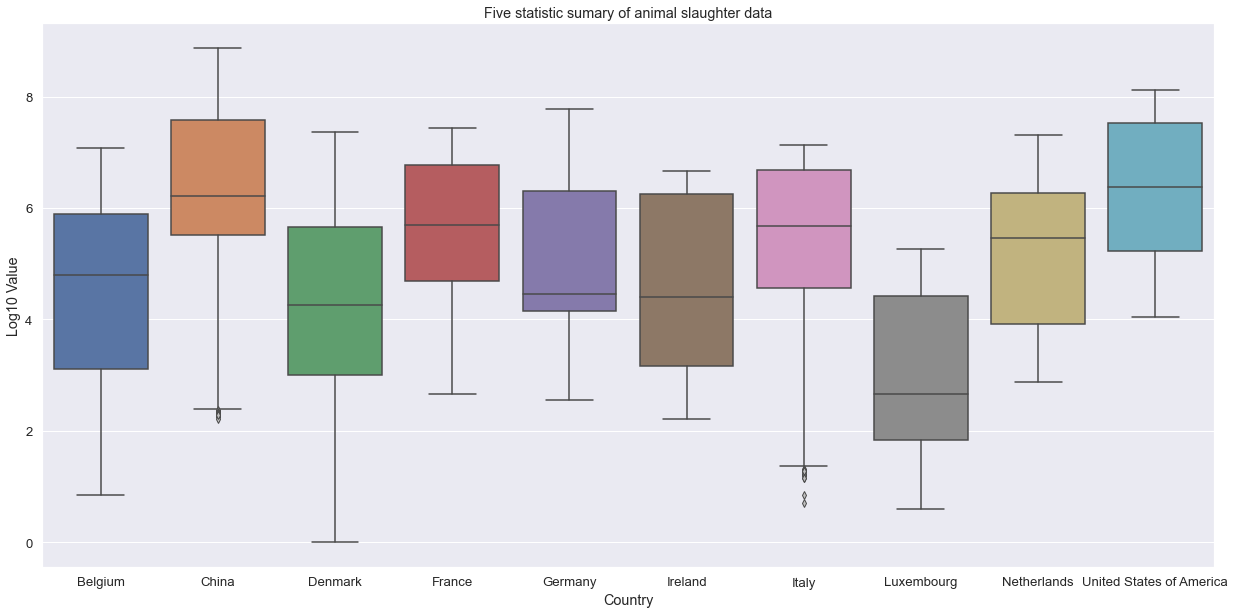

In [177]:
myboxplot(slaughter_clean["Area"],slaughter_clean["LogValue"],"Five statistic sumary of animal slaughter data", "Country",
          "Log10 Value")

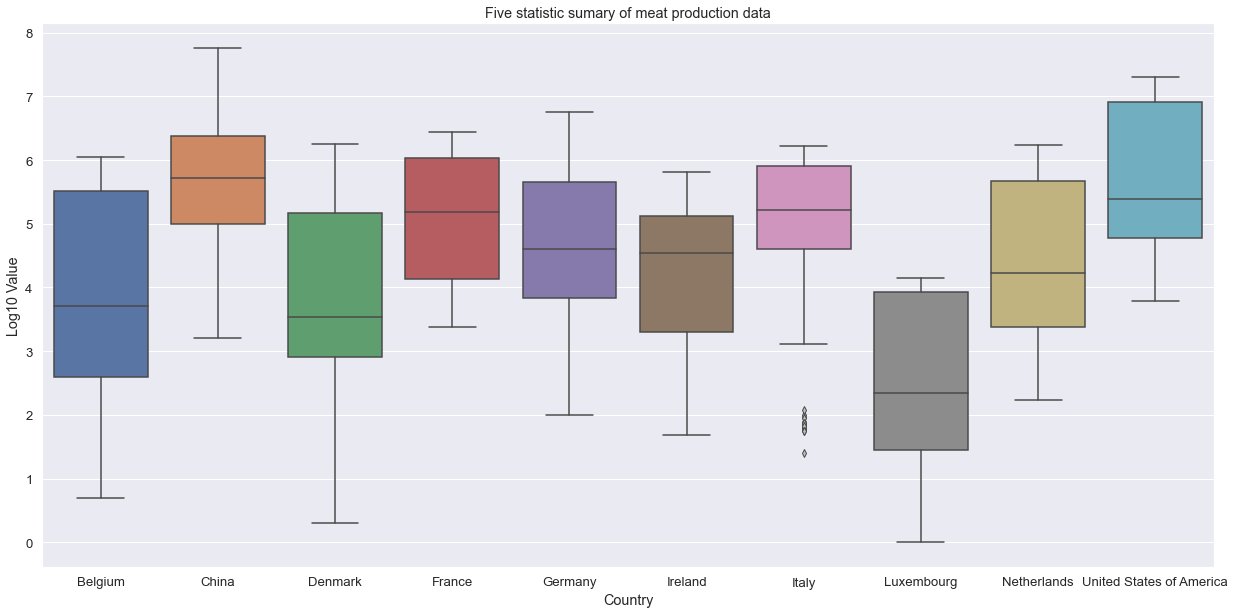

In [178]:
myboxplot(meat_clean["Area"],meat_clean["LogValue"],"Five statistic sumary of meat production data", "Country",
          "Log10 Value")

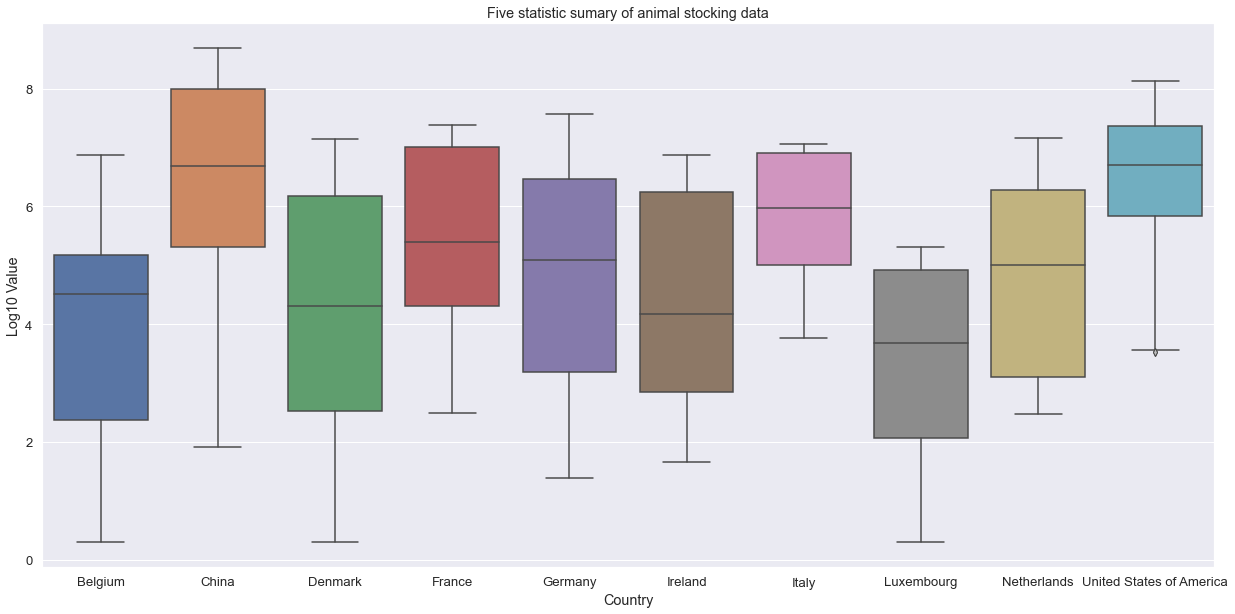

In [179]:
myboxplot(stock_clean["Area"],stock_clean["LogValue"],"Five statistic sumary of animal stocking data", "Country",
          "Log10 Value")

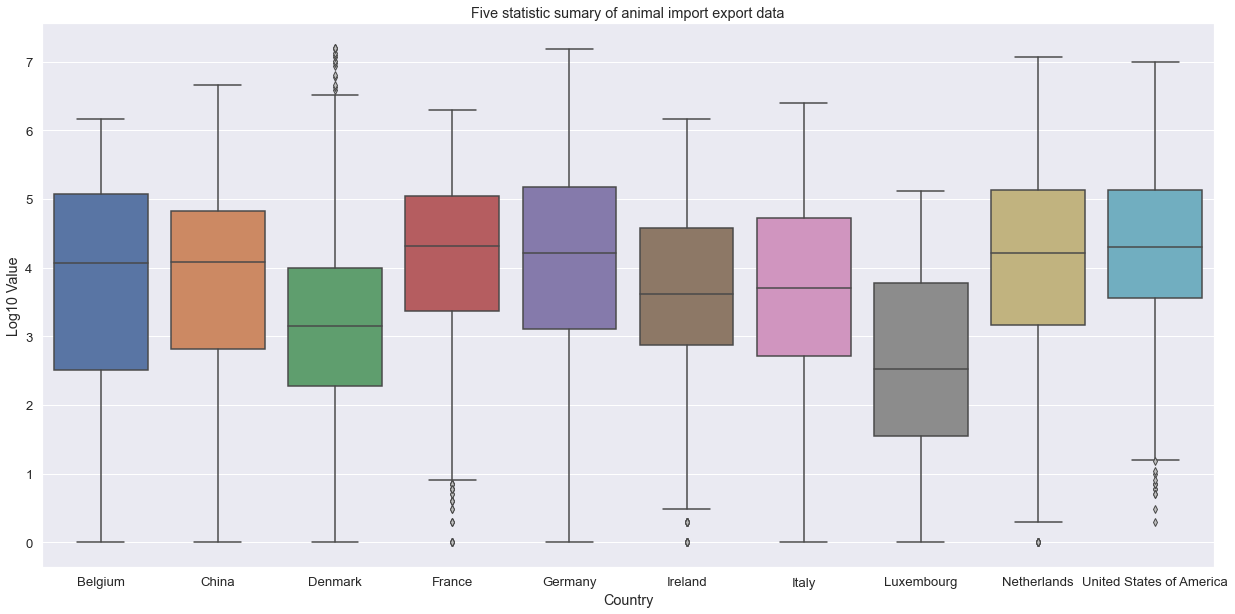

In [180]:
myboxplot(imp_exp_clean["Area"],imp_exp_clean["LogValue"],"Five statistic sumary of animal import export data", "Country",
          "Log10 Value")

### Removal of outliers

In [181]:
def calculate_IQR(dataframe):
    '''This function takes multiple dataframes as input, calculates the interquartile range (IQR)
    of the 'column' using numpy and returns it'''
    q3, q1 = np.percentile(dataframe, [75, 25])
    IQR = q3 - q1
    return IQR

In [182]:
slaughter_clean.describe()

,Year,Value,LogValue
count,3625.000000,3.625000e+03,3625.000000
mean,1997.617103,1.242131e+07,5.203364
std,13.743918,5.708594e+07,1.680947
min,1973.000000,1.000000e+00,0.000000
25%,1986.000000,1.500000e+04,4.176091
50%,1999.000000,2.426330e+05,5.384950
75%,2009.000000,3.031165e+06,6.481610
max,2020.000000,7.449179e+08,8.872108


In [183]:
calculate_IQR(slaughter_clean.Value)

3016165.0

In [184]:
# Writing a function to remove outliers
def remove_outliers(dataframe, colname, limit):
    '''This functions takes a dataframe, a column and a lower domain limit 
    as input and removes the outliers from the specified column'''
    Q3, Q1 = np.percentile(dataframe[colname], [75, 25])
    IQR_md = Q3 - Q1

    upper_limit_md = Q3 + (IQR_md * 1.5)
    lower_limit_md = Q1 - (IQR_md * 1.5)

    if lower_limit_md < limit:
        lower_limit_md = limit
    else:
        lower_limit_md = Q1 - (IQR_md * 1.5)

    dataframe = dataframe[(dataframe[colname] >= lower_limit_md) &
                                       (dataframe[colname] <= upper_limit_md)]
    return dataframe

In [185]:
slaughter_clean = remove_outliers(slaughter_clean,"Value", 1)
slaughter_clean = remove_outliers(slaughter_clean,"LogValue", 0)

meat_clean = remove_outliers(meat_clean,"Value", 1)
meat_clean = remove_outliers(meat_clean,"LogValue", 0)

stock_clean = remove_outliers(stock_clean,"Value", 1)
stock_clean = remove_outliers(stock_clean,"LogValue", 0)

imp_exp_clean = remove_outliers(imp_exp_clean,"Value", 0)
imp_exp_clean = remove_outliers(imp_exp_clean,"LogValue", 0)

In [186]:
# meat_clean the removal of outliers worked
slaughter_clean.describe()

,Year,Value,LogValue
count,2982.000000,2.982000e+03,2982.000000
mean,1997.596244,8.204522e+05,4.739396
std,13.748421,1.566842e+06,1.404645
min,1973.000000,7.000000e+00,0.845098
25%,1986.000000,7.000000e+03,3.845098
50%,1999.000000,7.729700e+04,4.888159
75%,2009.000000,7.069242e+05,5.849373
max,2020.000000,7.543945e+06,6.877599


## Merging the datasets

In [187]:
# Dropping the indexs before merging with pandas
slaughter_clean.reset_index(drop=True, inplace=True)
meat_clean.reset_index(drop=True, inplace=True)
stock_clean.reset_index(drop=True, inplace=True)

In [188]:
# Here I merge all thew agricultural datasets into one, as they all have the same column
# names but different categories I have used an outer merge.

data = pd.merge(slaughter_clean, meat_clean, how="outer")
data = pd.merge(data, stock_clean, how="outer")

In [189]:
data.head()

,Area,Element,Item,Year,Unit,Value,LogValue
0,Belgium,Slaughtered,Cattle,2000,Head,832926.0,5.920606
1,Belgium,Slaughtered,Cattle,2001,Head,873268.0,5.941148
2,Belgium,Slaughtered,Cattle,2002,Head,932473.0,5.969636
3,Belgium,Slaughtered,Cattle,2003,Head,853641.0,5.931275
4,Belgium,Slaughtered,Cattle,2004,Head,842585.0,5.925614


## Dealing with missing values

In [190]:
data.isnull().sum()

Area        0
Element     0
Item        0
Year        0
Unit        0
Value       0
LogValue    0
dtype: int64

The merging of the dataframe has not added any missing or 'null' values

## Dropping the logvalue column

In [191]:
# Next i will drop the LogValue column as this was introduced only to assist
# Visualisation of large numbers during plotting, I do not need this as a label
# Value and it will correlate with the y value if left as a feature, due
# to it being a long of the Y value

data = data.drop(["LogValue"],axis=1)

## Selecting Ireland for machine learning

In [192]:
# Making a function to select country
def select_country(country):
    '''This function takes a country as input and filters the dataframe to
    select 5 animals for that specific country and create a new dataframe
    with this information'''
    df = data.loc[(data['Item'] == "Cattle")|
               (data['Item'] == "Chicken")|
               (data['Item'] == "Pig")|
               (data['Item'] == "Sheep")|
               (data['Item'] == "Horse")]

    df = df.loc[(df['Area'] == country)].reset_index(drop=True)
    return df

In [193]:
Ireland_df = select_country("Ireland")

In [194]:
Ireland_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Area     710 non-null    object 
 1   Element  710 non-null    object 
 2   Item     710 non-null    object 
 3   Year     710 non-null    int64  
 4   Unit     710 non-null    object 
 5   Value    710 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 33.4+ KB


In [195]:
Ireland_df.head()

,Area,Element,Item,Year,Unit,Value
0,Ireland,Slaughtered,Cattle,1973,Head,869900.0
1,Ireland,Slaughtered,Cattle,1974,Head,1358000.0
2,Ireland,Slaughtered,Cattle,1975,Head,1748000.0
3,Ireland,Slaughtered,Cattle,1976,Head,1295600.0
4,Ireland,Slaughtered,Cattle,1977,Head,1457000.0


In [196]:
print(f"The area in this dataframe is: {Ireland_df.Area.unique()}\n")
print(f"The animals in this dataframe are: {Ireland_df.Item.unique()}\n")
print(f"The units in this dataframe are: {Ireland_df.Unit.unique()}\n")

The area in this dataframe is: ['Ireland']

The animals in this dataframe are: ['Cattle' 'Chicken' 'Horse' 'Pig' 'Sheep']

The units in this dataframe are: ['Head' '1000 Head' 'Tonnes']



## Pivoting the Irish data

In [197]:
def make_pivot2(dataframe):
    '''This function takes a data frame as input, and then pivots the df so that each
    countrys values are within their own column with animal and year in the rows as index.'''
    dataframe = pd.pivot_table(data=dataframe, index=["Year","Item"], values="Value", columns=["Area","Element"])
    
    dataframe.reset_index(inplace=True)
    dataframe.sort_values('Year', inplace=True, ascending=True)
    dataframe.set_index('Year', inplace=True)
    
    dataframe.columns = ["Animal", "Production", "Slaughtered", "Stocks"]
    
    return dataframe

In [198]:
Ireland_piv = make_pivot2(Ireland_df)

In [199]:
Ireland_piv.head(10)

,Animal,Production,Slaughtered,Stocks
Year,,,,
1973,Cattle,207300.0,869900.0,5945700.0
1973,Chicken,35800.0,24300.0,9144.0
1973,Horse,2320.0,8000.0,103300.0
1973,Pig,143000.0,2111000.0,1007200.0
1973,Sheep,43363.0,1690000.0,2834600.0
1974,Cattle,342000.0,1358000.0,6408000.0
1974,Chicken,28000.0,23000.0,9048.0
1974,Horse,2086.0,7000.0,98100.0
1974,Pig,131000.0,1973000.0,1035300.0


## Dealing with missing values created by pivot

In [200]:
Ireland = Ireland_piv
Ireland.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 1973 to 2020
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Animal       239 non-null    object 
 1   Production   237 non-null    float64
 2   Slaughtered  237 non-null    float64
 3   Stocks       236 non-null    float64
dtypes: float64(3), object(1)
memory usage: 9.3+ KB


In [201]:
def total_missing(df):
    '''This function takes a dataframe as output and prints out the number
    (int) value and the percentage of missing values'''
    print(f"The number of missing values is \n{df.isnull().sum()}\n")
    print(f"{calc_percent_missing(df.isnull().sum(), len(df))}")

In [202]:
total_missing(Ireland)

The number of missing values is 
Animal         0
Production     2
Slaughtered    2
Stocks         3
dtype: int64

The percentage of missing values is:
Animal         0.00
Production     0.84
Slaughtered    0.84
Stocks         1.26
dtype: float64
None


# drop the NAN

There are no missing values in the irish subset data

## Setting up X and y train test

As I'm going to be using multiple countries as X and y, I have setup a function rapidly create them

In [203]:
# creating a function to select X & y
def get_X_y(dataframe):
    '''This function takes a dataframe as input and returns X & y'''
    X = dataframe.drop(columns="Production")
    y = dataframe.Production
    return X, y

In [204]:
# Setting up X and y

X, y = get_X_y(Ireland)

In [205]:
X

,Animal,Slaughtered,Stocks
Year,,,
1973,Cattle,869900.0,5945700.0
1973,Chicken,24300.0,9144.0
1973,Horse,8000.0,103300.0
1973,Pig,2111000.0,1007200.0
1973,Sheep,1690000.0,2834600.0
...,...,...,...
2019,Sheep,3050200.0,3809370.0
2020,Pig,3546350.0,1678570.0
2020,Cattle,1881890.0,6529440.0


## Splitting into train and test sets

In [223]:
from sklearn.model_selection import train_test_split

# Split the data set into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [224]:
#Checking the shapes are the same

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(191, 3)
(191,)
(48, 3)
(48,)


## X_train, X_ test scaling and encoding

In [225]:
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [226]:
cat_selector = make_column_selector(dtype_include=object)
num_selector = make_column_selector(dtype_exclude=object)

In order to prevent over fitting, the X_train and X_test data needs to be scaled after it has been split. Otherwise data
leakage shall occur where the test set will inadvertently be given information about the data's mean value when it is scaled. 
By scaling them separately you prevent the test set form being given data it should not know about and improve model accuracy by preventing over fitting.

(Reference: Chapter 6 of 'Introduction to Machine Learning in Python Chapter' on pipelines).

In [227]:
# Creating a function to Scale the numerical X columns and one hot encode the 
# y columns. For this function to work it is important you create two 
# new instances of One Hot encoder for each dataset, if you use the same one
# the function will not encode the second set properly
# So each new X_train, Test must have a new pair of encoders if doing multiple
# datasets

def ml_data_prep(X_train, X_test, ohe, ohe2):
    '''This function takes X_train and X_Test as inputs and 2 one hot encoders.
    It then scales the test and train sets seperately to prevent data leakage, 
    it then identifies the categorical columns in both sets 
    and one hot encodes them'''
    X_train[num_selector] = StandardScaler().fit_transform(X_train[num_selector])
    X_test[num_selector] = StandardScaler().fit_transform(X_test[num_selector])
    
    ohe.fit_transform(X_train[cat_selector])
    encoded_train = pd.DataFrame(data=ohe.fit_transform(X_train[cat_selector]), columns=ohe.get_feature_names(), index=X_train.index)
    ohe2 = OneHotEncoder(sparse=False)
    ohe2.fit_transform(X_test[cat_selector])
    encoded_test = pd.DataFrame(data=ohe2.fit_transform(X_test[cat_selector]), columns=ohe2.get_feature_names(), index=X_test.index)
    
    X_train = pd.concat([X_train[num_selector], encoded_train], axis=1)
    X_train.reset_index(inplace=True)
    X_train.sort_values('Year', inplace=True, ascending=True)
    X_train.set_index('Year', inplace=True, drop=True)
    
    X_test = pd.concat([X_test[num_selector], encoded_test], axis=1)
    X_test.reset_index(inplace=True)
    X_test.sort_values('Year', inplace=True, ascending=True)
    X_test.set_index('Year', inplace=True, drop=True)
    
    return X_train, X_test

In [228]:
ohe = OneHotEncoder(sparse=False)
ohe2 = OneHotEncoder(sparse=False)

X_train, X_test = ml_data_prep(X_train, X_test, ohe, ohe2)

In [229]:
X_train

,Slaughtered,Stocks,x0_Cattle,x0_Chicken,x0_Horse,x0_Pig,x0_Sheep
Year,,,,,,,
1973,-1.040084,-0.860119,0.0,0.0,1.0,0.0,0.0
1973,-1.028216,-0.895768,0.0,1.0,0.0,0.0,0.0
1973,0.491048,-0.517889,0.0,0.0,0.0,1.0,0.0
1973,0.184531,0.173991,0.0,0.0,0.0,0.0,1.0
1973,-0.412560,1.351899,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2019,1.471184,-0.288422,0.0,0.0,0.0,1.0,0.0
2020,1.219606,0.568742,0.0,0.0,0.0,0.0,1.0
2020,1.536084,-0.263699,0.0,0.0,0.0,1.0,0.0


In [230]:
X_train.fillna(method='ffill', inplace = True)
X_test.fillna(method='ffill',inplace = True)
y_train.fillna(method='ffill',inplace = True)
y_test.fillna(method='ffill',inplace = True)

In [232]:
X_train

,Slaughtered,Stocks,x0_Cattle,x0_Chicken,x0_Horse,x0_Pig,x0_Sheep
Year,,,,,,,
1973,-1.040084,-0.860119,0.0,0.0,1.0,0.0,0.0
1973,-1.028216,-0.895768,0.0,1.0,0.0,0.0,0.0
1973,0.491048,-0.517889,0.0,0.0,0.0,1.0,0.0
1973,0.184531,0.173991,0.0,0.0,0.0,0.0,1.0
1973,-0.412560,1.351899,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2019,1.471184,-0.288422,0.0,0.0,0.0,1.0,0.0
2020,1.219606,0.568742,0.0,0.0,0.0,0.0,1.0
2020,1.536084,-0.263699,0.0,0.0,0.0,1.0,0.0


# Random Forest - Regressor model 1

### RF Optimised using GridSearch CV

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rfr = RandomForestRegressor(random_state=42)

param_grid = {'bootstrap': [True, False],
    'n_estimators': [200, 800, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 50, 100],
}

CV_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5)

CV_rfr.fit(X_train, y_train)
print(CV_rfr.best_params_)

## Model metrics

In [ ]:
# importing regression metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Performing a prediction with the RF model

y_pred = CV_rfr.predict(X_test)

In [ ]:
# Calculating the performance of the model

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"The mean square error is: {mse}")
print(f"The mean absolute error is: {mae}")

Model is very over fit, we shall try to improve by removing the test train split and only doing cross validation.

This is due to the dataset being small in size, so the train test is splitting 80-20% and then cross fold is splitting each 5x again with cv=5. Therefore, I can re-attempt without the train test split.

In [ ]:
# Calculating the performance of the model

mse = mean_squared_error(y_test, y_pred)

print(f"The mean square error is: {mse}")

In [ ]:
# Calculating the performance of the model

mae = mean_absolute_error(y_test, y_pred)

print(f"The mean absolute error is: {mae}")

## Finding Important Features of RF-V2 using Scikit-learn

The model performed poorly so there is no need to get feature importance, however for the purposes of this CA I have demonstrated how to do it here

In [ ]:
ohe.get_feature_names()

In [ ]:
sorted_idx = CV_rfr.best_estimator_.feature_importances_.argsort()

In [ ]:
CV_rfr.best_estimator_.feature_importances_

In [ ]:
newCols = data.columns
df = newCols

In [ ]:
np.array(X_train.columns)[sorted_idx][CV_rfr.best_estimator_.feature_importances_ > cutOff]

In [ ]:
cutOff = 0.04
plt.figure(figsize=(10,15))
plt.barh(np.array(X_train.columns)[sorted_idx][CV_rfr.best_estimator_.feature_importances_ > cutOff], 
         CV_rfr.best_estimator_.feature_importances_[sorted_idx][CV_rfr.best_estimator_.feature_importances_ > cutOff])
plt.xlabel("Feature Importance")

# Random Forest Regressor 2 - No train test split, Cross Validation Only

The introduction to machine learning in Python books states that for small datasets, train test split in combination with crossfold validation might split the data into too many small parts for the model to train successfully. This is the issue with the datasets as while there are many total observations, these equate to one per year per animal group from 2020 to 1973. Therefore, this results in a small number of observations being available for training after the data is split.

In this model, we shall attempt to train the model using X & y without a split and use cross validation = 5.

## Creating X2 and y2, scaling and encoding

In [ ]:
# Copying X and y from RF1
X2 = X
y2 = y

In [ ]:
X2[num_selector] = StandardScaler().fit_transform(X2[num_selector])

In [ ]:
ohe3 = OneHotEncoder(sparse=False)

ohe3.fit_transform(X2[cat_selector])
encoded_train = pd.DataFrame(data=ohe3.fit_transform(X2[cat_selector]), columns=ohe3.get_feature_names(), index=X2.index)

In [ ]:
# I am not using the function here as there is no X_test
X2 = pd.concat([X2[num_selector], encoded_train], axis=1)
X2.reset_index(inplace=True)
X2.sort_values('Year', inplace=True, ascending=True)
X2.set_index('Year', inplace=True, drop=True)
X2

##  Model 2 execution

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rfr2 = RandomForestRegressor(random_state=42)

param_grid = {'bootstrap': [True, False],
    'n_estimators': [200, 800, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 50, 100],
}

CV_rfr2 = GridSearchCV(estimator=rfr2, param_grid=param_grid, cv=5)

CV_rfr2.fit(X2, y2)
print(CV_rfr2.best_params_)

In [ ]:
# Performing a prediction with the RF model

y_pred_r = CV_rfr2.predict(X2)

In [ ]:
# Checking the train and test accuracy of the model
print(f"The score is: {CV_rfr2.score(X2, y2)}")


Score is now 87% however, there is no way to evaluate if the model is over fit. Therefore the only way to determine if the model is working is run an evaluation versus another countries data. This model was trained on Ireland so we can use another European country for the validation.

In [ ]:
# Calculating the performance of the model

mse = mean_squared_error(y_test, y_pred_r)
mae = mean_absolute_error(y_test, y_pred_r)

print(f"mae: {mae}, \nmse: {mse}")

## Saving RF2 for validation using 'Pickle'

In [227]:
import pickle

In [ ]:
# create an iterator object with write permission - model.pkl
with open('RandF2', 'wb') as files:
    pickle.dump(CV_rfr2, files)

## Importing the model as needed

In [236]:
import pickle

# load saved model
with open('RandF2' , 'rb') as f:
    RF2V = pickle.load(f)

# Validation testing of RF model 2 on data from Belgium

## Selecting Belgian Data

In [270]:
# Selecting the countries and livestock for comparison

val_df = select_country("Belgium")

In [271]:
val_df = make_pivot2(val_df)

In [272]:
val_df.reset_index(inplace=True)
val_df.sort_values('Year', inplace=True, ascending=True)
val_df.set_index('Year', inplace=True)

In [273]:
val_df.head(10)

,Animal,Production,Slaughtered,Stocks
Year,,,,
2000,Cattle,275360.0,832926.0,3041560.0
2000,Chicken,400360.0,276000.0,39000.0
2000,Horse,5900.0,20400.0,31000.0
2000,Pig,1042320.0,NaN,7368540.0
2000,Sheep,4490.0,218000.0,125639.0
2001,Cattle,285250.0,873268.0,3037760.0
2001,Chicken,406172.0,262000.0,38529.0
2001,Horse,6000.0,21400.0,31163.0
2001,Pig,1062400.0,NaN,6833720.0


### Dealing with missing values

In [274]:
calc_percent_missing(val_df.isnull().sum(), len(val_df))

The percentage of missing values is:
Animal          0.00
Production      0.00
Slaughtered    20.39
Stocks          4.85
dtype: float64


In [275]:
val_df.head()

,Animal,Production,Slaughtered,Stocks
Year,,,,
2000,Cattle,275360.0,832926.0,3041560.0
2000,Chicken,400360.0,276000.0,39000.0
2000,Horse,5900.0,20400.0,31000.0
2000,Pig,1042320.0,NaN,7368540.0
2000,Sheep,4490.0,218000.0,125639.0


As all of the missing values in Belgium are for Pigs between 2000 and 2020, this data is not missing at random and too old to be useful therefore I shall remove Pigs

In [276]:
val_df.fillna(method='ffill', inplace=True)

In [277]:
calc_percent_missing(val_df.isnull().sum(), len(val_df))

The percentage of missing values is:
Animal         0.0
Production     0.0
Slaughtered    0.0
Stocks         0.0
dtype: float64


### Creating X3

In [279]:
X3 = val_df.drop(columns='Production')
y3 = val_df.Production

### Scaling and OHE X3

As this is a validation there is no train test split so I don't use the function to clean up. I just do it manually as there is only one set of data

In [280]:
X3[num_selector] = StandardScaler().fit_transform(X3[num_selector])

In [281]:
ohe4 = OneHotEncoder(sparse=False)

ohe4.fit_transform(X3[cat_selector])
encoded_train = pd.DataFrame(data=ohe4.fit_transform(X3[cat_selector]), columns=ohe4.get_feature_names(), index=X3.index)

In [282]:
X3 = pd.concat([X3[num_selector], encoded_train], axis=1)
X3.reset_index(inplace=True)
X3.sort_values('Year', inplace=True, ascending=True)
X3.set_index('Year', inplace=True, drop=True)
X3

,Slaughtered,Stocks,x0_Cattle,x0_Chicken,x0_Horse,x0_Pig,x0_Sheep
Year,,,,,,,
2000,1.807437,0.410679,1.0,0.0,0.0,0.0,0.0
2000,-0.009321,-0.781082,0.0,1.0,0.0,0.0,0.0
2000,-0.843117,-0.784257,0.0,0.0,1.0,0.0,0.0
2000,-0.843117,2.128121,0.0,0.0,0.0,1.0,0.0
2000,-0.198523,-0.746694,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
2019,1.823630,0.145357,1.0,0.0,0.0,0.0,0.0
2020,1.643430,0.130409,1.0,0.0,0.0,0.0,0.0
2020,0.060146,0.130409,0.0,1.0,0.0,0.0,0.0


## Validation Predicting X3

In [283]:
RF2V.score(X3, y3)

-0.2252080471535325

Validation shows Model Random Forest 2 is over fit.

# K-Nearest Neighbor (KNN) Regressor - Model 3

Here I will compare KNN Regressor to the X & y for Ireland inputs into Random Forest 1 to see if the model performs better

Importing KNN regressor model and setting the neighbors range

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
neighbors = np.arange(1, 21)                  # number of neighbors
train_accuracy = np.zeros(len(neighbors))    # Declare and initialise the matrix
test_accuracy = np.zeros(len(neighbors))     # Declare and initialise the matrix

Enumerating over all the 20 neighbor values and predicting both on training and testing data. Then we store, the accuracy in the X_train and y_train numpy arrays.

In [ ]:
for i,k in enumerate(neighbors):                          # for loop that checks the model for neighbor values 1, 2, 3, ..., 9
    knn = KNeighborsRegressor(n_neighbors = k)           # Initialise an object knn using KKNeighborsRegressor method

    #Fit the model
    knn.fit(X_train, y_train)                      # Call fit method to implement the ML KNeighborsRegressor model

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)   # Save the score value in the train_accuracy array

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)      # Save the score value in the train_accuracy array

Plotting the training and testing accuracy using matplotlib, with accuracy vs. varying number of neighbors graph. This allows us to visualise the best k value at which the KNN model performs the best.

In [ ]:
# Declare the size of the array
plt.figure(figsize = (10, 6))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend(prop = {'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()



The accuracy is decreasing in training, the data set is too small.

In [ ]:
# Declare and initialise an object 'KNeighborsClassifier' with 13 neighbors
knn = KNeighborsRegressor(n_neighbors = 1)

# Fitting the model
knn.fit(X_train, y_train)

# Computing accuracy on the training set
train_accuracy = knn.score(X_train, y_train)

# Computing accuracy on the test set
test_accuracy = knn.score(X_test, y_test)

## KNN Accuracy

In [ ]:
#Display training accuracy
print(f"The train accuracy is: {train_accuracy}")

# Displaying the test accuracy
print(f"The test accuracy is: {test_accuracy}")

The KNN model performance is poor. 

In [ ]:
print("Test set R^2: {:.2f}".format(knn.score(X_test, y_test)))

Here, the R square shows the model performed quite poorly

# Multiple Countries Random Forest Regressor - Model 4

Due to the issues with small sample size from subsetting the data to predict meat production based on slaughter numbers and stocking data. In this version of the model I will use the data from all countries with each country being it's own category in the rows.

For this version we shall use seven countries Ireland, France, Germany, Italy, Netherlands, China and the USA and compare across four animal types "Cattle, Chickens, Sheep and horses".

## Importing all countries data

In [ ]:
Multi = data.loc[(data['Item'] == "Cattle")| 
                      (data['Item'] == "Chicken")|
                      (data['Item'] == "Horse")|
                      (data['Item'] == "Sheep")]

Multi = Multi.loc[(Multi['Area'] == "Ireland")|
                    (Multi['Area'] == "France")|
                    (Multi['Area'] == "Germany")|
                    (Multi['Area'] == "Italy")|
                    (Multi['Area'] == "Netherlands")|
                    (Multi['Area'] == "China")|
                    (Multi['Area'] == "United States of America")]

In [ ]:
Multi2 = pd.pivot_table(Multi, index=["Year","Item","Area",], values="Value", columns=["Element"])

In [ ]:
Multi2.reset_index(inplace=True)
Multi2.sort_values('Year', inplace=True, ascending=True)
Multi2.set_index('Year', inplace=True)

In [ ]:
Multi2.columns = ["Item", "Area", "Production", "Slaughtered", "Stocks"]

In [ ]:
Multi2.head()

In [ ]:
total_missing(Multi2)

In [ ]:
Multi2 = Multi2.dropna()

## Creating X & y

In [ ]:
X4, y4 = get_X_y(Multi2)

## Splitting in train and test

In [ ]:
# Split the data set into train and test 
X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size = 0.2, random_state = 0)

## Scaling and encoding

In [ ]:
ohe4 = OneHotEncoder(sparse=False)
ohe5 = OneHotEncoder(sparse=False)

X_train, X_test = ml_data_prep(X_train, X_test, ohe4, ohe5)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rfr = RandomForestRegressor(random_state=42)

param_grid = {'bootstrap': [True, False],
    'n_estimators': [200, 800, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 50, 100],
}

CV_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5)

CV_rfr.fit(X_train, y_train)
print(CV_rfr.best_params_)

## Model metrics

In [ ]:
# importing regression metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Performing a prediction with the RF model

y_pred = CV_rfr.predict(X_test)

In [ ]:
# Checking the train and test accuracy of the model
print(f"The train score is: {CV_rfr.score(X_train, y_train)}")
print(f"The test score is: {CV_rfr.score(X_test, y_test)}")


Model performance is very poor.

In [ ]:
# Calculating the performance of the model

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"The mean square error is: {mse}")
print(f"The mean absolute error is: {mae}")

Running multiple countries did not improve model performance. Therefore, adding more data did not result in an increase in prediction accuracy, this highlights that animal stocking densities and animal slaughter numbers cannot be used to predict meat production. 

# Support vector machine (SVM)

In [233]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [235]:
regressor.score(X_train, y_train)

-0.1836188313109366

# Dashboard of results

# Appendix

In [ ]:
# importing the models

from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(X_train, y_train)

In [ ]:
# make prediction

prediction = LR.predict(X_test)

#plotting prediction line against actual test data
plt.plot(X_test, prediction, label='Linear Regression', color='b')
plt.scatter(X_test, y_test, label='Actual Test Data', color='g', alpha=.7)
plt.legend()
plt.show()


## Model Metrics

In [ ]:
y_pred = CV_rfr.predict(X_data)
print("Mean Square Error {} ".format(mean_squared_error(x.yData, y_pred)))
print("Mean Absolute Error {} ".format(mean_absolute_error(x.yData, y_pred)))
print("Mean Absolute Error {} ".format(CV_rfr_score(x.yData, y_pred)))

## Plotting prediction

In [ ]:
period = 75
x_ax = range(len(x.yData[:period]))
plt.scatter(x_ax, y_pred[:period], s=10, color="red", label="Prediction Counts")
plt.plot(x_ax, x.yData[:period], lw=1.5, color="blue", label="Actual Counts")
plt.legend()
plt.show()

## Building pipeline

In [ ]:
# Construction of a pipeline to run prepare data and run models.
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([("scaler", StandardScaler()), ("svm", SVC())])
# Careful here it is scaling the one hot encode, use column transofrmer instead
pipe.fit(X_train, y_train)

In [ ]:
print("Test score: {:.2f}".format(pipe.score(X_test, y_text)))

In [ ]:
# Setting up Gridsearch parameter grid
param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
             'svm__gamma': [0.001, 0.01, 0.1, 1, 10,100]}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

In [ ]:
mglearn.plots.plot_proper_proccessing()

## Model parameters RF & KNN

In [ ]:
# Random Forest Model Parameters
rfParams = {'bootstrap': [True, False], 
          'max_depth': [10, 20, 100], 
          'max_features': ['sqrt', 'log2', 'auto'], 
          'n_estimators': [10, 50, 100, 500, 1000, 2000]}

# Ridge Model Parameters
ridgeParams = {'alpha': [0.001, 0.01, 0.1, 1, 5, 10], 
          'normalize': [True, False]}

# Lasso Model Parameters
knnParams = {'n_neighbors': [5, 10, 15, 20, 30], 
          'leaf_size': [20, 30, 40, 50],
              'p': [1, 2]}

## Old ML pipe code

In [ ]:
# Building a pipeline to convert, categorise, transform and input data into
# machine learning models

from sklearn.pipeline import Pipeline

num_cols = X.select_dtypes(excludes=['object']).columns.tolist()
# This fetchs all the numerical columns in my data set

cat_cols = X.select_dtypes(include=['object']).columns.tolist()
# This fetchs all the obeject (categorical) columns in my data set,
# it is import to separate these out otherwise, when i scale using a pipeline, 
# it would result in the scaler, scaling my One hot encoded columns

## Save CSV code

In [ ]:
#Clean datasets
slaughter_clean.to_csv("C:\\Users\\shaun\\Desktop\\slaughter.csv", index=False)

meat_clean.to_csv("C:\\Users\\shaun\\Desktop\\meat.csv", index=False)

stock_clean.to_csv("C:\\Users\\shaun\\Desktop\\stock.csv", index=False)

imp_exp_clean.to_csv("C:\\Users\\shaun\\Desktop\\imp_exp.csv", index=False)

In [ ]:
slaughter_pivot.to_csv("C:\\Users\\shaun\\Desktop\\slaughter_pivot.csv")

In [ ]:
slaughter_subset.to_csv("C:\\Users\\shaun\\Desktop\\slaughter_subset.csv")
Meat_subset.to_csv("C:\\Users\\shaun\\Desktop\\Meat_subset.csv")
Livestock_subset.to_csv("C:\\Users\\shaun\\Desktop\\Livestock_subset.csv")
Imp_exp_subset.to_csv("C:\\Users\\shaun\\Desktop\\Imp_exp_subset.csv")

In [ ]:
slaughter_stats.to_csv("C:\\Users\\shaun\\Desktop\\slaughter_stats.csv")
meat_stats.to_csv("C:\\Users\\shaun\\Desktop\\meat_stats.csv")

Del appendix